In [4]:
import sys, os
sys.path.append("../..")
# Importing gempy
import gempy as gp

# Embedding matplotlib figures into the notebooks
%matplotlib inline

# Aux imports
import numpy as np
import pandas as pn
import matplotlib.pyplot as plt

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\elisa\Anaconda3\envs\gempy_n\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [ ]:
dfs = []
for letter in 'ABCD':
    dfs.append(pn.read_csv('../data/input_data/Moureze/'+letter+'Points.csv', sep=';',
                         names=['X', 'Y', 'Z', 'surface'], header=1)[::2])
surface_points = pn.concat(dfs)
#surface_points['surface'] = surface_points['surface'].astype('str')
surface_points.reset_index(inplace=True, drop=False)
surface_points.tail()

In [14]:
Moureze_points = pn.read_csv('../data/input_data/Moureze/Moureze_Points.csv', sep=';',
                         names=['X', 'Y', 'Z', 'G_x', 'G_y', 'G_z'], header=1)
Sections_EW = pn.read_csv('../data/input_data/Moureze/Sections_EW.csv', sep=';',
                         names=['X', 'Y', 'Z', 'ID'], header=1).dropna()
Sections_NS = pn.read_csv('../data/input_data/Moureze/Sections_NS.csv', sep=';',
                         names=['X', 'Y', 'Z', 'ID'], header=1).dropna()

In [27]:
mask_surfpoints = Moureze_points['G_x'] < -9999
surfpoints = Moureze_points[mask_surfpoints]
orientations = Moureze_points[~mask_surfpoints]

In [31]:
surfpoints['surface'] = 0.0
orientations['surface'] = 0.0

Suggested size of the axis-aligned modeling box:

Origin: -5 -5 -200

Maximum: 305 405 -50

Suggested resolution: 2m (grid size 156 x 206 x 76)

In [32]:
geo_model = gp.create_model('Moureze')
geo_model = gp.init_data(geo_model, [-5,305,-5,405,-200, -50],[156, 206, 76],
                        surface_points_df=surfpoints, orientations_df=orientations, surface_name='surface',
                         add_basement=True)

Active grids: ['regular']


C:\Users\elisa\Anaconda3\envs\gempy_n\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [33]:
geo_model.orientations

,X,Y,Z,X_r,Y_r,Z_r,G_x,G_y,G_z,dip,azimuth,polarity,surface,series,id,order_series,smooth
0,256.198395,344.000000,-100.0000,0.634653,0.682322,0.534193,0.671273,0.641262,0.371719,68.178328,46.309835,1,0,Default series,1,1,0.01
2,199.974075,351.877136,-157.3550,0.564083,0.692209,0.462203,0.447513,0.563921,0.694065,46.047243,38.434599,1,0,Default series,1,1,0.01
3,61.933350,21.684322,-124.5680,0.390820,0.277765,0.503356,-0.654601,0.659643,-0.369282,111.671343,315.219810,1,0,Default series,1,1,0.01
4,274.000000,130.465240,-128.0000,0.656997,0.414302,0.499048,0.292010,0.952812,-0.082946,94.757922,17.038825,1,0,Default series,1,1,0.01
5,91.941277,221.176559,-122.0210,0.428484,0.528159,0.506553,-0.089229,-0.573854,0.814082,35.503307,188.838190,1,0,Default series,1,1,0.01
6,222.377396,135.949524,-107.3770,0.592202,0.421185,0.524933,0.326241,-0.835915,0.441376,63.808292,158.680287,1,0,Default series,1,1,0.01
8,245.243591,196.000000,-152.0000,0.620903,0.496558,0.468924,0.910792,0.383353,0.153293,81.182191,67.173740,1,0,Default series,1,1,0.01
16,254.103210,48.000000,-108.0000,0.632023,0.310795,0.524151,0.560875,-0.410498,0.718965,44.030905,126.199970,1,0,Default series,1,1,0.01
17,89.947021,186.874222,-154.0190,0.425981,0.485104,0.466390,0.017744,0.234906,0.971856,13.625561,4.319725,1,0,Default series,1,1,0.01
22,250.000000,58.000000,-107.4140,0.626873,0.323347,0.524887,0.172384,0.197873,0.964951,15.214306,41.061893,1,0,Default series,1,1,0.01


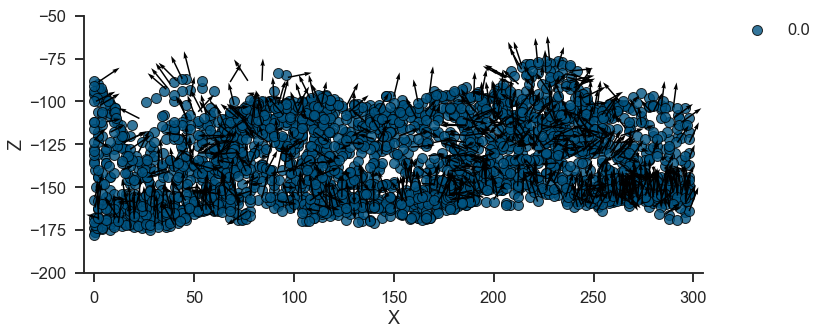

In [36]:
gp.plot.plot_data(geo_model, direction='y')

In [37]:
geo_model.surfaces

,surface,series,order_surfaces,isBasement,color,id
0,0,Default series,1,False,#015482,1
1,basement,Basement,1,True,#9f0052,2


In [38]:
gp.set_interpolation_data(geo_model, grid=None, compile_theano=True, sparse_version=False)

Compiling theano function...
Compilation Done!


In [39]:
s = gp.compute_model(geo_model, set_solutions=True)

C:\Users\elisa\Anaconda3\envs\gempy_n\lib\site-packages\theano\tensor\slinalg.py:255: LinAlgWarning: Ill-conditioned matrix (rcond=6.40273e-13): result may not be accurate.
  rval = scipy.linalg.solve(A, b)


MemoryError: 
Apply node that caused the error: Alloc(if{}.0, Subtensor{int64}.0, TensorConstant{1}, TensorConstant{1}, Subtensor{int64}.0)
Toposort index: 620
Inputs types: [TensorType(float32, vector), TensorType(int64, scalar), TensorType(int8, scalar), TensorType(int8, scalar), TensorType(int64, scalar)]
Inputs shapes: [(4782,), (), (), (), ()]
Inputs strides: [(4,), (), (), (), ()]
Inputs values: ['not shown', array(2447844, dtype=int64), array(1, dtype=int8), array(1, dtype=int8), array(4782, dtype=int64)]
Inputs type_num: [11, 9, 1, 1, 9]
Outputs clients: [[InplaceDimShuffle{0,2,1,3}(Alloc.0)]]

Backtrace when the node is created(use Theano flag traceback.limit=N to make it longer):
  File "../..\gempy\core\gempy_api.py", line 162, in set_interpolation_data
    geo_model.interpolator.compile_th_fn(inplace=True, grid=grid)
  File "../..\gempy\core\interpolator.py", line 880, in compile_th_fn
    self.theano_graph.compute_series(),
  File "../..\gempy\core\theano\theano_graph_pro.py", line 376, in compute_series
    profile=False
  File "C:\Users\elisa\Anaconda3\envs\gempy_n\lib\site-packages\theano\scan_module\scan.py", line 774, in scan
    condition, outputs, updates = scan_utils.get_updates_and_outputs(fn(*args))
  File "../..\gempy\core\theano\theano_graph_pro.py", line 1586, in compute_a_series
    Z_x = tif.ifelse(compute_scalar_ctr, self.compute_scalar_field(weights, self.grid_val_T),
  File "../..\gempy\core\theano\theano_graph_pro.py", line 330, in compute_scalar_field
    return self.scalar_field_at_all(weights, grid_val)
  File "../..\gempy\core\theano\theano_graph_pro.py", line 1231, in scalar_field_at_all
    tiled_weights = self.extend_dual_kriging(weights, grid_val.shape[0])
  File "../..\gempy\core\theano\theano_graph_pro.py", line 986, in extend_dual_kriging
    DK_weights = T.tile(DK_parameters, (grid_shape, 1)).T

Debugprint of the apply node: 
Alloc [id A] <TensorType(float32, (False, True, True, False))> ''   
 |if{} [id B] <TensorType(float32, vector)> ''   
 | |Vector controlling if weights must be recomputed[t] [id C] <TensorType(bool, scalar)>
 | |Reshape{1} [id D] <TensorType(float32, vector)> 'Dual Kriging parameters'   
 | |Subtensor{int32:int32:} [id E] <TensorType(float32, vector)> ''   
 |   |Weights vector[t-1] [id F] <TensorType(float32, vector)>
 |   |ScalarFromTensor [id G] <int32> ''   
 |   | |Length of weights in every series[t] [id H] <TensorType(int32, scalar)>
 |   |ScalarFromTensor [id I] <int32> ''   
 |     |Length of weights in every series[t+1] [id J] <TensorType(int32, scalar)>
 |Subtensor{int64} [id K] <TensorType(int64, scalar)> ''   
 | |Shape [id L] <TensorType(int64, vector)> ''   
 | | |Join [id M] <TensorType(float32, matrix)> ''   
 | |   |TensorConstant{0} [id N] <TensorType(int8, scalar)>
 | |   |Coordinates of the grid points to interpolate_copy [id O] <TensorType(float32, matrix)>
 | |   |AdvancedSubtensor1 [id P] <TensorType(float32, matrix)> ''   
 | |   | |All the surface_points points at once_copy [id Q] <TensorType(float32, matrix)>
 | |   | |Subtensor{int64} [id R] <TensorType(int64, vector)> ''   
 | |   |   |Nonzero [id S] <TensorType(int64, matrix)> ''   
 | |   |   | |AdvancedIncSubtensor1{no_inplace,set} [id T] <TensorType(int16, vector)> ''   
 | |   |   |   |Alloc [id U] <TensorType(int16, vector)> ''   
 | |   |   |   | |TensorConstant{1} [id V] <TensorType(int16, scalar)>
 | |   |   |   | |Subtensor{int64} [id W] <TensorType(int64, scalar)> ''   
 | |   |   |   |   |Shape [id X] <TensorType(int64, vector)> ''   
 | |   |   |   |   | |All the surface_points points at once_copy [id Q] <TensorType(float32, matrix)>
 | |   |   |   |   |Constant{0} [id Y] <int64>
 | |   |   |   |TensorConstant{0} [id N] <TensorType(int8, scalar)>
 | |   |   |   |CumOp{None, add} [id Z] <TensorType(int32, vector)> ''   
 | |   |   |     |Join [id BA] <TensorType(int32, vector)> ''   
 | |   |   |       |TensorConstant{0} [id N] <TensorType(int8, scalar)>
 | |   |   |       |TensorConstant{(1,) of 0} [id BB] <TensorType(int8, vector)>
 | |   |   |       |Elemwise{add,no_inplace} [id BC] <TensorType(int32, vector)> ''   
 | |   |   |         |Subtensor{:int64:} [id BD] <TensorType(int32, vector)> ''   
 | |   |   |         | |Number of points per surface used to split rest-ref_copy [id BE] <TensorType(int32, vector)>
 | |   |   |         | |Constant{-1} [id BF] <int64>
 | |   |   |         |TensorConstant{(1,) of 1} [id BG] <TensorType(int8, (True,))>
 | |   |   |Constant{0} [id Y] <int64>
 | |   |Subtensor{int64} [id BH] <TensorType(float32, matrix)> ''   
 | |     |Subtensor{int64::} [id BI] <TensorType(float32, 3D)> ''   
 | |     | |for{cpu,scan_fn} [id BJ] <TensorType(float32, 3D)> ''   
 | |     | | |Elemwise{minimum,no_inplace} [id BK] <TensorType(int64, scalar)> ''   
 | |     | | | |Elemwise{minimum,no_inplace} [id BL] <TensorType(int64, scalar)> ''   
 | |     | | | | |Subtensor{int64} [id BM] <TensorType(int64, scalar)> ''   
 | |     | | | | | |Shape [id BN] <TensorType(int64, vector)> ''   
 | |     | | | | | | |Subtensor{int64::} [id BO] <TensorType(float32, matrix)> ''   
 | |     | | | | | |   |AdvancedSubtensor1 [id BP] <TensorType(float32, matrix)> ''   
 | |     | | | | | |   | |All the surface_points points at once_copy [id Q] <TensorType(float32, matrix)>
 | |     | | | | | |   | |CumOp{None, add} [id Z] <TensorType(int32, vector)> ''   
 | |     | | | | | |   |Constant{0} [id Y] <int64>
 | |     | | | | | |Constant{0} [id Y] <int64>
 | |     | | | | |Subtensor{int64} [id BQ] <TensorType(int64, scalar)> ''   
 | |     | | | |   |Shape [id BR] <TensorType(int64, vector)> ''   
 | |     | | | |   | |Subtensor{int64:int64:} [id BS] <TensorType(int32, vector)> ''   
 | |     | | | |   |   |CumOp{None, add} [id BT] <TensorType(int32, vector)> ''   
 | |     | | | |   |   | |Join [id BU] <TensorType(int32, vector)> ''   
 | |     | | | |   |   |   |TensorConstant{0} [id N] <TensorType(int8, scalar)>
 | |     | | | |   |   |   |TensorConstant{(1,) of 0} [id BB] <TensorType(int8, vector)>
 | |     | | | |   |   |   |Number of points per surface used to split rest-ref_copy [id BE] <TensorType(int32, vector)>
 | |     | | | |   |   |Constant{0} [id Y] <int64>
 | |     | | | |   |   |Constant{-1} [id BF] <int64>
 | |     | | | |   |Constant{0} [id Y] <int64>
 | |     | | | |Subtensor{int64} [id BV] <TensorType(int64, scalar)> ''   
 | |     | | |   |Shape [id BW] <TensorType(int64, vector)> ''   
 | |     | | |   | |Subtensor{int64::} [id BX] <TensorType(int32, vector)> ''   
 | |     | | |   |   |CumOp{None, add} [id BT] <TensorType(int32, vector)> ''   
 | |     | | |   |   |Constant{1} [id BY] <int64>
 | |     | | |   |Constant{0} [id Y] <int64>
 | |     | | |Subtensor{:int64:} [id BZ] <TensorType(float32, matrix)> ''   
 | |     | | | |Subtensor{int64::} [id BO] <TensorType(float32, matrix)> ''   
 | |     | | | |ScalarFromTensor [id CA] <int64> ''   
 | |     | | |   |Elemwise{minimum,no_inplace} [id BK] <TensorType(int64, scalar)> ''   
 | |     | | |Subtensor{:int64:} [id CB] <TensorType(int32, vector)> ''   
 | |     | | | |Subtensor{int64:int64:} [id BS] <TensorType(int32, vector)> ''   
 | |     | | | |ScalarFromTensor [id CA] <int64> ''   
 | |     | | |Subtensor{:int64:} [id CC] <TensorType(int32, vector)> ''   
 | |     | | | |Subtensor{int64::} [id BX] <TensorType(int32, vector)> ''   
 | |     | | | |ScalarFromTensor [id CA] <int64> ''   
 | |     | | |IncSubtensor{Set;:int64:} [id CD] <TensorType(float32, 3D)> ''   
 | |     | |   |AllocEmpty{dtype='float32'} [id CE] <TensorType(float32, 3D)> ''   
 | |     | |   | |Elemwise{add,no_inplace} [id CF] <TensorType(int64, scalar)> ''   
 | |     | |   | | |Elemwise{minimum,no_inplace} [id BK] <TensorType(int64, scalar)> ''   
 | |     | |   | | |Subtensor{int64} [id CG] <TensorType(int64, scalar)> ''   
 | |     | |   | |   |Shape [id CH] <TensorType(int64, vector)> ''   
 | |     | |   | |   | |Rebroadcast{0} [id CI] <TensorType(float32, 3D)> ''   
 | |     | |   | |   |   |InplaceDimShuffle{x,0,1} [id CJ] <TensorType(float32, (True, False, False))> ''   
 | |     | |   | |   |     |Alloc [id CK] <TensorType(float32, matrix)> ''   
 | |     | |   | |   |       |TensorConstant{0.0} [id CL] <TensorType(float32, scalar)>
 | |     | |   | |   |       |Subtensor{int64} [id CM] <TensorType(int32, scalar)> ''   
 | |     | |   | |   |       | |CumOp{None, add} [id BT] <TensorType(int32, vector)> ''   
 | |     | |   | |   |       | |Constant{-1} [id BF] <int64>
 | |     | |   | |   |       |TensorConstant{3} [id CN] <TensorType(int8, scalar)>
 | |     | |   | |   |Constant{0} [id Y] <int64>
 | |     | |   | |Subtensor{int64} [id CO] <TensorType(int64, scalar)> ''   
 | |     | |   | | |Shape [id CH] <TensorType(int64, vector)> ''   
 | |     | |   | | |Constant{1} [id BY] <int64>
 | |     | |   | |Subtensor{int64} [id CP] <TensorType(int64, scalar)> ''   
 | |     | |   |   |Shape [id CH] <TensorType(int64, vector)> ''   
 | |     | |   |   |Constant{2} [id CQ] <int64>
 | |     | |   |Rebroadcast{0} [id CI] <TensorType(float32, 3D)> ''   
 | |     | |   |ScalarFromTensor [id CR] <int64> ''   
 | |     | |     |Subtensor{int64} [id CG] <TensorType(int64, scalar)> ''   
 | |     | |Constant{1} [id BY] <int64>
 | |     |Constant{-1} [id BF] <int64>
 | |Constant{0} [id Y] <int64>
 |TensorConstant{1} [id CS] <TensorType(int8, scalar)>
 |TensorConstant{1} [id CS] <TensorType(int8, scalar)>
 |Subtensor{int64} [id CT] <TensorType(int64, scalar)> ''   
   |Shape [id CU] <TensorType(int64, vector)> ''   
   | |if{} [id B] <TensorType(float32, vector)> ''   
   |Constant{0} [id Y] <int64>

Inner graphs of the scan ops:

for{cpu,scan_fn} [id BJ] <TensorType(float32, 3D)> ''   
 >IncSubtensor{Set;int32:int32:} [id CV] <TensorType(float32, matrix)> ''   
 > |<TensorType(float32, matrix)> [id CW] <TensorType(float32, matrix)> -> [id CD]
 > |Alloc [id CX] <TensorType(float32, matrix)> ''   
 > | |<TensorType(float32, vector)> [id CY] <TensorType(float32, vector)> -> [id BZ]
 > | |Elemwise{sub,no_inplace} [id CZ] <TensorType(int32, scalar)> ''   
 > | | |<TensorType(int32, scalar)> [id DA] <TensorType(int32, scalar)> -> [id CC]
 > | | |<TensorType(int32, scalar)> [id DB] <TensorType(int32, scalar)> -> [id CB]
 > | |TensorConstant{3} [id DC] <TensorType(int8, scalar)>
 > |ScalarFromTensor [id DD] <int32> ''   
 > | |<TensorType(int32, scalar)> [id DB] <TensorType(int32, scalar)> -> [id CB]
 > |ScalarFromTensor [id DE] <int32> ''   
 >   |<TensorType(int32, scalar)> [id DA] <TensorType(int32, scalar)> -> [id CC]

Storage map footprint:
 - Alloc.0, Shape: (4782, 4782), ElemSize: 4 Byte(s), TotalSize: 91470096 Byte(s)
 - IncSubtensor{Set;int64:int64:, int64:int64:}.0, Shape: (4782, 4782), ElemSize: 4 Byte(s), TotalSize: 91470096 Byte(s)
 - IncSubtensor{Set;int64:int64:, int64:int64:}.0, Shape: (4782, 4782), ElemSize: 4 Byte(s), TotalSize: 91470096 Byte(s)
 - IncSubtensor{Set;int64:int64:, int64:int64:}.0, Shape: (4782, 4782), ElemSize: 4 Byte(s), TotalSize: 91470096 Byte(s)
 - IncSubtensor{Set;int64:int64:, int64::}.0, Shape: (4782, 4782), ElemSize: 4 Byte(s), TotalSize: 91470096 Byte(s)
 - IncSubtensor{Set;int64:int64:, int64:int64:}.0, Shape: (4782, 4782), ElemSize: 4 Byte(s), TotalSize: 91470096 Byte(s)
 - IncSubtensor{Set;int64:int64:, int64:int64:}.0, Shape: (4782, 4782), ElemSize: 4 Byte(s), TotalSize: 91470096 Byte(s)
 - IncSubtensor{Set;int64:int64:, int64:int64:}.0, Shape: (4782, 4782), ElemSize: 4 Byte(s), TotalSize: 91470096 Byte(s)
 - IncSubtensor{Set;int64:int64:, int64::}.0, Shape: (4782, 4782), ElemSize: 4 Byte(s), TotalSize: 91470096 Byte(s)
 - IncSubtensor{Set;int64:int64:, int64:int64:}.0, Shape: (4782, 4782), ElemSize: 4 Byte(s), TotalSize: 91470096 Byte(s)
 - IncSubtensor{Set;int64:int64:, int64:int64:}.0, Shape: (4782, 4782), ElemSize: 4 Byte(s), TotalSize: 91470096 Byte(s)
 - IncSubtensor{Set;int64::, int64:int64:}.0, Shape: (4782, 4782), ElemSize: 4 Byte(s), TotalSize: 91470096 Byte(s)
 - Block Covariance Matrix, Shape: (4782, 4782), ElemSize: 4 Byte(s), TotalSize: 91470096 Byte(s)
 - Dot22.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{add,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{sub,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{maximum,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{sqrt,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{true_div,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{pow,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{pow,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{pow,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{pow,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{sub,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{add,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{sub,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{add,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Dot22.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{add,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{sub,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{maximum,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{sqrt,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{true_div,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{pow,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{pow,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{pow,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{pow,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{sub,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{add,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{sub,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{add,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Dot22.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{add,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{sub,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{maximum,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{sqrt,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{true_div,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{pow,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{pow,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{pow,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{pow,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{sub,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{add,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{sub,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{add,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Dot22.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{add,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{sub,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{maximum,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{sqrt,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{true_div,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{pow,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{pow,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{pow,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{pow,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{sub,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{add,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{sub,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{add,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{sub,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{sub,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{add,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Eye{dtype='float32'}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Covariance SurfacePoints, Shape: (2754, 2754), ElemSize: 4 Byte(s), TotalSize: 30338064 Byte(s)
 - Join.0, Shape: (2447844, 3), ElemSize: 4 Byte(s), TotalSize: 29374128 Byte(s)
 - Coordinates of the grid points to interpolate_copy, Input, Shape: (2442336, 3), ElemSize: 4 Byte(s), TotalSize: 29308032 Byte(s)
 - Dot22.0, Shape: (2025, 2754), ElemSize: 4 Byte(s), TotalSize: 22307400 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2025, 2754), ElemSize: 4 Byte(s), TotalSize: 22307400 Byte(s)
 - Elemwise{add,no_inplace}.0, Shape: (2025, 2754), ElemSize: 4 Byte(s), TotalSize: 22307400 Byte(s)
 - Elemwise{sub,no_inplace}.0, Shape: (2025, 2754), ElemSize: 4 Byte(s), TotalSize: 22307400 Byte(s)
 - Elemwise{maximum,no_inplace}.0, Shape: (2025, 2754), ElemSize: 4 Byte(s), TotalSize: 22307400 Byte(s)
 - Elemwise{sqrt,no_inplace}.0, Shape: (2025, 2754), ElemSize: 4 Byte(s), TotalSize: 22307400 Byte(s)
 - Elemwise{pow,no_inplace}.0, Shape: (2025, 2754), ElemSize: 4 Byte(s), TotalSize: 22307400 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2025, 2754), ElemSize: 4 Byte(s), TotalSize: 22307400 Byte(s)
 - Elemwise{true_div,no_inplace}.0, Shape: (2025, 2754), ElemSize: 4 Byte(s), TotalSize: 22307400 Byte(s)
 - Elemwise{pow,no_inplace}.0, Shape: (2025, 2754), ElemSize: 4 Byte(s), TotalSize: 22307400 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2025, 2754), ElemSize: 4 Byte(s), TotalSize: 22307400 Byte(s)
 - Elemwise{true_div,no_inplace}.0, Shape: (2025, 2754), ElemSize: 4 Byte(s), TotalSize: 22307400 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2025, 2754), ElemSize: 4 Byte(s), TotalSize: 22307400 Byte(s)
 - Elemwise{true_div,no_inplace}.0, Shape: (2025, 2754), ElemSize: 4 Byte(s), TotalSize: 22307400 Byte(s)
 - Elemwise{add,no_inplace}.0, Shape: (2025, 2754), ElemSize: 4 Byte(s), TotalSize: 22307400 Byte(s)
 - Elemwise{sub,no_inplace}.0, Shape: (2025, 2754), ElemSize: 4 Byte(s), TotalSize: 22307400 Byte(s)
 - Elemwise{add,no_inplace}.0, Shape: (2025, 2754), ElemSize: 4 Byte(s), TotalSize: 22307400 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2025, 2754), ElemSize: 4 Byte(s), TotalSize: 22307400 Byte(s)
 - Join.0, Shape: (2025, 2754), ElemSize: 4 Byte(s), TotalSize: 22307400 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2025, 2754), ElemSize: 4 Byte(s), TotalSize: 22307400 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2025, 2754), ElemSize: 4 Byte(s), TotalSize: 22307400 Byte(s)
 - Dot22.0, Shape: (2025, 2754), ElemSize: 4 Byte(s), TotalSize: 22307400 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2025, 2754), ElemSize: 4 Byte(s), TotalSize: 22307400 Byte(s)
 - Elemwise{add,no_inplace}.0, Shape: (2025, 2754), ElemSize: 4 Byte(s), TotalSize: 22307400 Byte(s)
 - Elemwise{sub,no_inplace}.0, Shape: (2025, 2754), ElemSize: 4 Byte(s), TotalSize: 22307400 Byte(s)
 - Elemwise{maximum,no_inplace}.0, Shape: (2025, 2754), ElemSize: 4 Byte(s), TotalSize: 22307400 Byte(s)
 - Elemwise{sqrt,no_inplace}.0, Shape: (2025, 2754), ElemSize: 4 Byte(s), TotalSize: 22307400 Byte(s)
 - Elemwise{pow,no_inplace}.0, Shape: (2025, 2754), ElemSize: 4 Byte(s), TotalSize: 22307400 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2025, 2754), ElemSize: 4 Byte(s), TotalSize: 22307400 Byte(s)
 - Elemwise{true_div,no_inplace}.0, Shape: (2025, 2754), ElemSize: 4 Byte(s), TotalSize: 22307400 Byte(s)
 - Elemwise{pow,no_inplace}.0, Shape: (2025, 2754), ElemSize: 4 Byte(s), TotalSize: 22307400 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2025, 2754), ElemSize: 4 Byte(s), TotalSize: 22307400 Byte(s)
 - Elemwise{true_div,no_inplace}.0, Shape: (2025, 2754), ElemSize: 4 Byte(s), TotalSize: 22307400 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2025, 2754), ElemSize: 4 Byte(s), TotalSize: 22307400 Byte(s)
 - Elemwise{true_div,no_inplace}.0, Shape: (2025, 2754), ElemSize: 4 Byte(s), TotalSize: 22307400 Byte(s)
 - Elemwise{add,no_inplace}.0, Shape: (2025, 2754), ElemSize: 4 Byte(s), TotalSize: 22307400 Byte(s)
 - Elemwise{sub,no_inplace}.0, Shape: (2025, 2754), ElemSize: 4 Byte(s), TotalSize: 22307400 Byte(s)
 - Elemwise{add,no_inplace}.0, Shape: (2025, 2754), ElemSize: 4 Byte(s), TotalSize: 22307400 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2025, 2754), ElemSize: 4 Byte(s), TotalSize: 22307400 Byte(s)
 - Join.0, Shape: (2025, 2754), ElemSize: 4 Byte(s), TotalSize: 22307400 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2025, 2754), ElemSize: 4 Byte(s), TotalSize: 22307400 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2025, 2754), ElemSize: 4 Byte(s), TotalSize: 22307400 Byte(s)
 - Elemwise{sub,no_inplace}.0, Shape: (2025, 2754), ElemSize: 4 Byte(s), TotalSize: 22307400 Byte(s)
 - InplaceDimShuffle{1,0}.0, Shape: (2754, 2025), ElemSize: 4 Byte(s), TotalSize: 22307400 Byte(s)
 - Covariance gradient interface, Shape: (2754, 2025), ElemSize: 4 Byte(s), TotalSize: 22307400 Byte(s)
 - Covariance gradient interface.T, Shape: (2025, 2754), ElemSize: 4 Byte(s), TotalSize: 22307400 Byte(s)
 - Dot22.0, Shape: (2025, 2025), ElemSize: 4 Byte(s), TotalSize: 16402500 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2025, 2025), ElemSize: 4 Byte(s), TotalSize: 16402500 Byte(s)
 - Elemwise{add,no_inplace}.0, Shape: (2025, 2025), ElemSize: 4 Byte(s), TotalSize: 16402500 Byte(s)
 - Elemwise{sub,no_inplace}.0, Shape: (2025, 2025), ElemSize: 4 Byte(s), TotalSize: 16402500 Byte(s)
 - Elemwise{maximum,no_inplace}.0, Shape: (2025, 2025), ElemSize: 4 Byte(s), TotalSize: 16402500 Byte(s)
 - Elemwise{sqrt,no_inplace}.0, Shape: (2025, 2025), ElemSize: 4 Byte(s), TotalSize: 16402500 Byte(s)
 - Elemwise{pow,no_inplace}.0, Shape: (2025, 2025), ElemSize: 4 Byte(s), TotalSize: 16402500 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2025, 2025), ElemSize: 4 Byte(s), TotalSize: 16402500 Byte(s)
 - Elemwise{true_div,no_inplace}.0, Shape: (2025, 2025), ElemSize: 4 Byte(s), TotalSize: 16402500 Byte(s)
 - Elemwise{pow,no_inplace}.0, Shape: (2025, 2025), ElemSize: 4 Byte(s), TotalSize: 16402500 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2025, 2025), ElemSize: 4 Byte(s), TotalSize: 16402500 Byte(s)
 - Elemwise{true_div,no_inplace}.0, Shape: (2025, 2025), ElemSize: 4 Byte(s), TotalSize: 16402500 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2025, 2025), ElemSize: 4 Byte(s), TotalSize: 16402500 Byte(s)
 - Elemwise{true_div,no_inplace}.0, Shape: (2025, 2025), ElemSize: 4 Byte(s), TotalSize: 16402500 Byte(s)
 - Elemwise{add,no_inplace}.0, Shape: (2025, 2025), ElemSize: 4 Byte(s), TotalSize: 16402500 Byte(s)
 - Elemwise{sub,no_inplace}.0, Shape: (2025, 2025), ElemSize: 4 Byte(s), TotalSize: 16402500 Byte(s)
 - Elemwise{add,no_inplace}.0, Shape: (2025, 2025), ElemSize: 4 Byte(s), TotalSize: 16402500 Byte(s)
 - Elemwise{second,no_inplace}.0, Shape: (2025, 2025), ElemSize: 4 Byte(s), TotalSize: 16402500 Byte(s)
 - IncSubtensor{Set;int64:int64:, int64:int64:}.0, Shape: (2025, 2025), ElemSize: 4 Byte(s), TotalSize: 16402500 Byte(s)
 - IncSubtensor{Set;int64:int64:, int64:int64:}.0, Shape: (2025, 2025), ElemSize: 4 Byte(s), TotalSize: 16402500 Byte(s)
 - IncSubtensor{Set;int64:int64:, int64:int64:}.0, Shape: (2025, 2025), ElemSize: 4 Byte(s), TotalSize: 16402500 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2025, 2025), ElemSize: 4 Byte(s), TotalSize: 16402500 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2025, 2025), ElemSize: 4 Byte(s), TotalSize: 16402500 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2025, 2025), ElemSize: 4 Byte(s), TotalSize: 16402500 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2025, 2025), ElemSize: 4 Byte(s), TotalSize: 16402500 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2025, 2025), ElemSize: 4 Byte(s), TotalSize: 16402500 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2025, 2025), ElemSize: 4 Byte(s), TotalSize: 16402500 Byte(s)
 - Elemwise{sub,no_inplace}.0, Shape: (2025, 2025), ElemSize: 4 Byte(s), TotalSize: 16402500 Byte(s)
 - Elemwise{add,no_inplace}.0, Shape: (2025, 2025), ElemSize: 4 Byte(s), TotalSize: 16402500 Byte(s)
 - Elemwise{sub,no_inplace}.0, Shape: (2025, 2025), ElemSize: 4 Byte(s), TotalSize: 16402500 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2025, 2025), ElemSize: 4 Byte(s), TotalSize: 16402500 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2025, 2025), ElemSize: 4 Byte(s), TotalSize: 16402500 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2025, 2025), ElemSize: 4 Byte(s), TotalSize: 16402500 Byte(s)
 - Elemwise{true_div,no_inplace}.0, Shape: (2025, 2025), ElemSize: 4 Byte(s), TotalSize: 16402500 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2025, 2025), ElemSize: 4 Byte(s), TotalSize: 16402500 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2025, 2025), ElemSize: 4 Byte(s), TotalSize: 16402500 Byte(s)
 - Elemwise{add,no_inplace}.0, Shape: (2025, 2025), ElemSize: 4 Byte(s), TotalSize: 16402500 Byte(s)
 - Elemwise{pow,no_inplace}.0, Shape: (2025, 2025), ElemSize: 4 Byte(s), TotalSize: 16402500 Byte(s)
 - Join.0, Shape: (2025, 2025), ElemSize: 4 Byte(s), TotalSize: 16402500 Byte(s)
 - InplaceDimShuffle{1,0}.0, Shape: (2025, 2025), ElemSize: 4 Byte(s), TotalSize: 16402500 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2025, 2025), ElemSize: 4 Byte(s), TotalSize: 16402500 Byte(s)
 - Elemwise{true_div,no_inplace}.0, Shape: (2025, 2025), ElemSize: 4 Byte(s), TotalSize: 16402500 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2025, 2025), ElemSize: 4 Byte(s), TotalSize: 16402500 Byte(s)
 - Elemwise{sub,no_inplace}.0, Shape: (2025, 2025), ElemSize: 4 Byte(s), TotalSize: 16402500 Byte(s)
 - Elemwise{switch,no_inplace}.0, Shape: (2025, 2025), ElemSize: 4 Byte(s), TotalSize: 16402500 Byte(s)
 - Eye{dtype='float32'}.0, Shape: (2025, 2025), ElemSize: 4 Byte(s), TotalSize: 16402500 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2025, 2025), ElemSize: 4 Byte(s), TotalSize: 16402500 Byte(s)
 - Covariance Gradient, Shape: (2025, 2025), ElemSize: 4 Byte(s), TotalSize: 16402500 Byte(s)
 - block matrix[t-1], Input, Shape: (1, 1, 2447844), ElemSize: 4 Byte(s), TotalSize: 9791376 Byte(s)
 - Scalar matrix[t-1], Input, Shape: (1, 2447844), ElemSize: 4 Byte(s), TotalSize: 9791376 Byte(s)
 - Elemwise{lt,no_inplace}.0, Shape: (2754, 2754), ElemSize: 1 Byte(s), TotalSize: 7584516 Byte(s)
 - Elemwise{lt,no_inplace}.0, Shape: (2754, 2754), ElemSize: 1 Byte(s), TotalSize: 7584516 Byte(s)
 - Elemwise{lt,no_inplace}.0, Shape: (2754, 2754), ElemSize: 1 Byte(s), TotalSize: 7584516 Byte(s)
 - Elemwise{lt,no_inplace}.0, Shape: (2754, 2754), ElemSize: 1 Byte(s), TotalSize: 7584516 Byte(s)
 - Elemwise{sub,no_inplace}.0, Shape: (2754, 675), ElemSize: 4 Byte(s), TotalSize: 7435800 Byte(s)
 - InplaceDimShuffle{1,0}.0, Shape: (675, 2754), ElemSize: 4 Byte(s), TotalSize: 7435800 Byte(s)
 - Elemwise{sub,no_inplace}.0, Shape: (2754, 675), ElemSize: 4 Byte(s), TotalSize: 7435800 Byte(s)
 - InplaceDimShuffle{1,0}.0, Shape: (675, 2754), ElemSize: 4 Byte(s), TotalSize: 7435800 Byte(s)
 - Elemwise{sub,no_inplace}.0, Shape: (2754, 675), ElemSize: 4 Byte(s), TotalSize: 7435800 Byte(s)
 - InplaceDimShuffle{1,0}.0, Shape: (675, 2754), ElemSize: 4 Byte(s), TotalSize: 7435800 Byte(s)
 - Elemwise{sub,no_inplace}.0, Shape: (2754, 675), ElemSize: 4 Byte(s), TotalSize: 7435800 Byte(s)
 - InplaceDimShuffle{1,0}.0, Shape: (675, 2754), ElemSize: 4 Byte(s), TotalSize: 7435800 Byte(s)
 - Elemwise{sub,no_inplace}.0, Shape: (2754, 675), ElemSize: 4 Byte(s), TotalSize: 7435800 Byte(s)
 - InplaceDimShuffle{1,0}.0, Shape: (675, 2754), ElemSize: 4 Byte(s), TotalSize: 7435800 Byte(s)
 - Elemwise{sub,no_inplace}.0, Shape: (2754, 675), ElemSize: 4 Byte(s), TotalSize: 7435800 Byte(s)
 - InplaceDimShuffle{1,0}.0, Shape: (675, 2754), ElemSize: 4 Byte(s), TotalSize: 7435800 Byte(s)
 - Elemwise{lt,no_inplace}.0, Shape: (2025, 2754), ElemSize: 1 Byte(s), TotalSize: 5576850 Byte(s)
 - Elemwise{lt,no_inplace}.0, Shape: (2025, 2754), ElemSize: 1 Byte(s), TotalSize: 5576850 Byte(s)
 - Alloc.0, Shape: (1, 3, 675, 675), ElemSize: 4 Byte(s), TotalSize: 5467500 Byte(s)
 - InplaceDimShuffle{0,2,1,3}.0, Shape: (1, 675, 3, 675), ElemSize: 4 Byte(s), TotalSize: 5467500 Byte(s)
 - Reshape{2}.0, Shape: (675, 2025), ElemSize: 4 Byte(s), TotalSize: 5467500 Byte(s)
 - Alloc.0, Shape: (1, 3, 675, 675), ElemSize: 4 Byte(s), TotalSize: 5467500 Byte(s)
 - InplaceDimShuffle{0,2,1,3}.0, Shape: (1, 675, 3, 675), ElemSize: 4 Byte(s), TotalSize: 5467500 Byte(s)
 - Reshape{2}.0, Shape: (675, 2025), ElemSize: 4 Byte(s), TotalSize: 5467500 Byte(s)
 - Alloc.0, Shape: (1, 3, 675, 675), ElemSize: 4 Byte(s), TotalSize: 5467500 Byte(s)
 - InplaceDimShuffle{0,2,1,3}.0, Shape: (1, 675, 3, 675), ElemSize: 4 Byte(s), TotalSize: 5467500 Byte(s)
 - Reshape{2}.0, Shape: (675, 2025), ElemSize: 4 Byte(s), TotalSize: 5467500 Byte(s)
 - Elemwise{lt,no_inplace}.0, Shape: (2025, 2025), ElemSize: 1 Byte(s), TotalSize: 4100625 Byte(s)
 - Elemwise{eq,no_inplace}.0, Shape: (2025, 2025), ElemSize: 1 Byte(s), TotalSize: 4100625 Byte(s)
 - mask matrix[t-1], Input, Shape: (1, 2447844), ElemSize: 1 Byte(s), TotalSize: 2447844 Byte(s)
 - Elemwise{sub,no_inplace}.0, Shape: (675, 675), ElemSize: 4 Byte(s), TotalSize: 1822500 Byte(s)
 - Elemwise{sub,no_inplace}.0, Shape: (675, 675), ElemSize: 4 Byte(s), TotalSize: 1822500 Byte(s)
 - Elemwise{sub,no_inplace}.0, Shape: (675, 675), ElemSize: 4 Byte(s), TotalSize: 1822500 Byte(s)
 - Join.0, Shape: (9, 2754), ElemSize: 4 Byte(s), TotalSize: 99144 Byte(s)
 - InplaceDimShuffle{1,0}.0, Shape: (2754, 9), ElemSize: 4 Byte(s), TotalSize: 99144 Byte(s)
 - Alloc.0, Shape: (2025, 9), ElemSize: 4 Byte(s), TotalSize: 72900 Byte(s)
 - IncSubtensor{Set;:int64:, int64}.0, Shape: (2025, 9), ElemSize: 4 Byte(s), TotalSize: 72900 Byte(s)
 - IncSubtensor{Set;int64:int64:, int64}.0, Shape: (2025, 9), ElemSize: 4 Byte(s), TotalSize: 72900 Byte(s)
 - IncSubtensor{Set;int64:int64:, int64}.0, Shape: (2025, 9), ElemSize: 4 Byte(s), TotalSize: 72900 Byte(s)
 - IncSubtensor{Set;:int64:, int64}.0, Shape: (2025, 9), ElemSize: 4 Byte(s), TotalSize: 72900 Byte(s)
 - IncSubtensor{Set;int64:int64:, int64}.0, Shape: (2025, 9), ElemSize: 4 Byte(s), TotalSize: 72900 Byte(s)
 - IncSubtensor{Set;int64:int64:, int64}.0, Shape: (2025, 9), ElemSize: 4 Byte(s), TotalSize: 72900 Byte(s)
 - IncSubtensor{Set;:int64:, int64}.0, Shape: (2025, 9), ElemSize: 4 Byte(s), TotalSize: 72900 Byte(s)
 - IncSubtensor{Set;int64:int64:, int64}.0, Shape: (2025, 9), ElemSize: 4 Byte(s), TotalSize: 72900 Byte(s)
 - IncSubtensor{Set;:int64:, int64}.0, Shape: (2025, 9), ElemSize: 4 Byte(s), TotalSize: 72900 Byte(s)
 - IncSubtensor{Set;int64:int64:, int64}.0, Shape: (2025, 9), ElemSize: 4 Byte(s), TotalSize: 72900 Byte(s)
 - IncSubtensor{Set;int64:int64:, int64}.0, Shape: (2025, 9), ElemSize: 4 Byte(s), TotalSize: 72900 Byte(s)
 - Drift foliations, Shape: (2025, 9), ElemSize: 4 Byte(s), TotalSize: 72900 Byte(s)
 - AllocEmpty{dtype='float32'}.0, Shape: (2, 2754, 3), ElemSize: 4 Byte(s), TotalSize: 66096 Byte(s)
 - IncSubtensor{Set;:int64:}.0, Shape: (2, 2754, 3), ElemSize: 4 Byte(s), TotalSize: 66096 Byte(s)
 - for{cpu,scan_fn}.0, Shape: (2, 2754, 3), ElemSize: 4 Byte(s), TotalSize: 66096 Byte(s)
 - All the surface_points points at once_copy, Input, Shape: (2755, 3), ElemSize: 4 Byte(s), TotalSize: 33060 Byte(s)
 - AdvancedSubtensor1.0, Shape: (2754, 3), ElemSize: 4 Byte(s), TotalSize: 33048 Byte(s)
 - Subtensor{int32:int32:, ::}.0, Shape: (2754, 3), ElemSize: 4 Byte(s), TotalSize: 33048 Byte(s)
 - Alloc.0, Shape: (2754, 3), ElemSize: 4 Byte(s), TotalSize: 33048 Byte(s)
 - InplaceDimShuffle{x,0,1}.0, Shape: (1, 2754, 3), ElemSize: 4 Byte(s), TotalSize: 33048 Byte(s)
 - Rebroadcast{0}.0, Shape: (1, 2754, 3), ElemSize: 4 Byte(s), TotalSize: 33048 Byte(s)
 - Subtensor{int64::}.0, Shape: (1, 2754, 3), ElemSize: 4 Byte(s), TotalSize: 33048 Byte(s)
 - Subtensor{int64}.0, Shape: (2754, 3), ElemSize: 4 Byte(s), TotalSize: 33048 Byte(s)
 - Subtensor{int32:int32:, ::}.0, Shape: (2754, 3), ElemSize: 4 Byte(s), TotalSize: 33048 Byte(s)
 - Subtensor{::, :int32:}.0, Shape: (2754, 3), ElemSize: 4 Byte(s), TotalSize: 33048 Byte(s)
 - Elemwise{neg,no_inplace}.0, Shape: (2754, 3), ElemSize: 4 Byte(s), TotalSize: 33048 Byte(s)
 - InplaceDimShuffle{1,0}.0, Shape: (3, 2754), ElemSize: 4 Byte(s), TotalSize: 33048 Byte(s)
 - InplaceDimShuffle{1,0}.0, Shape: (3, 2754), ElemSize: 4 Byte(s), TotalSize: 33048 Byte(s)
 - Elemwise{pow,no_inplace}.0, Shape: (2754, 3), ElemSize: 4 Byte(s), TotalSize: 33048 Byte(s)
 - Elemwise{pow,no_inplace}.0, Shape: (2754, 3), ElemSize: 4 Byte(s), TotalSize: 33048 Byte(s)
 - InplaceDimShuffle{1,0}.0, Shape: (3, 2754), ElemSize: 4 Byte(s), TotalSize: 33048 Byte(s)
 - Alloc.0, Shape: (3, 1, 675, 3), ElemSize: 4 Byte(s), TotalSize: 24300 Byte(s)
 - InplaceDimShuffle{0,2,1,3}.0, Shape: (3, 675, 1, 3), ElemSize: 4 Byte(s), TotalSize: 24300 Byte(s)
 - Reshape{2}.0, Shape: (2025, 3), ElemSize: 4 Byte(s), TotalSize: 24300 Byte(s)
 - Subtensor{::, :int32:}.0, Shape: (2025, 3), ElemSize: 4 Byte(s), TotalSize: 24300 Byte(s)
 - InplaceDimShuffle{1,0}.0, Shape: (3, 2025), ElemSize: 4 Byte(s), TotalSize: 24300 Byte(s)
 - Elemwise{pow,no_inplace}.0, Shape: (2025, 3), ElemSize: 4 Byte(s), TotalSize: 24300 Byte(s)
 - InplaceDimShuffle{1,0}.0, Shape: (3, 2025), ElemSize: 4 Byte(s), TotalSize: 24300 Byte(s)
 - Nonzero.0, Shape: (1, 2754), ElemSize: 8 Byte(s), TotalSize: 22032 Byte(s)
 - Subtensor{int64}.0, Shape: (2754,), ElemSize: 8 Byte(s), TotalSize: 22032 Byte(s)
 - AllocEmpty{dtype='float32'}.0, Shape: (2, 2754, 1), ElemSize: 4 Byte(s), TotalSize: 22032 Byte(s)
 - IncSubtensor{Set;:int64:}.0, Shape: (2, 2754, 1), ElemSize: 4 Byte(s), TotalSize: 22032 Byte(s)
 - for{cpu,scan_fn}.0, Shape: (2, 2754, 1), ElemSize: 4 Byte(s), TotalSize: 22032 Byte(s)
 - TensorConstant{[   1    2..4998 4999]}, Shape: (4999,), ElemSize: 4 Byte(s), TotalSize: 19996 Byte(s)
 - Weights vector[t-1], Input, Shape: (4782,), ElemSize: 4 Byte(s), TotalSize: 19128 Byte(s)
 - Alloc.0, Shape: (4782,), ElemSize: 4 Byte(s), TotalSize: 19128 Byte(s)
 - b vector, Shape: (4782,), ElemSize: 4 Byte(s), TotalSize: 19128 Byte(s)
 - Solve{A_structure='general', lower=False, overwrite_A=False, overwrite_b=False}.0, Shape: (4782,), ElemSize: 4 Byte(s), TotalSize: 19128 Byte(s)
 - Dual Kriging parameters, Shape: (4782,), ElemSize: 4 Byte(s), TotalSize: 19128 Byte(s)
 - if{}.0, Shape: (4782,), ElemSize: 4 Byte(s), TotalSize: 19128 Byte(s)
 - Nugget effect of scalar_copy, Input, Shape: (2755,), ElemSize: 4 Byte(s), TotalSize: 11020 Byte(s)
 - Subtensor{::, int64}.0, Shape: (2754,), ElemSize: 4 Byte(s), TotalSize: 11016 Byte(s)
 - Subtensor{::, int64}.0, Shape: (2754,), ElemSize: 4 Byte(s), TotalSize: 11016 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2754,), ElemSize: 4 Byte(s), TotalSize: 11016 Byte(s)
 - Subtensor{::, int64}.0, Shape: (2754,), ElemSize: 4 Byte(s), TotalSize: 11016 Byte(s)
 - Subtensor{::, int64}.0, Shape: (2754,), ElemSize: 4 Byte(s), TotalSize: 11016 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2754,), ElemSize: 4 Byte(s), TotalSize: 11016 Byte(s)
 - Elemwise{sub,no_inplace}.0, Shape: (2754,), ElemSize: 4 Byte(s), TotalSize: 11016 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2754,), ElemSize: 4 Byte(s), TotalSize: 11016 Byte(s)
 - InplaceDimShuffle{x,0}.0, Shape: (1, 2754), ElemSize: 4 Byte(s), TotalSize: 11016 Byte(s)
 - Subtensor{::, int64}.0, Shape: (2754,), ElemSize: 4 Byte(s), TotalSize: 11016 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2754,), ElemSize: 4 Byte(s), TotalSize: 11016 Byte(s)
 - Subtensor{::, int64}.0, Shape: (2754,), ElemSize: 4 Byte(s), TotalSize: 11016 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2754,), ElemSize: 4 Byte(s), TotalSize: 11016 Byte(s)
 - Elemwise{sub,no_inplace}.0, Shape: (2754,), ElemSize: 4 Byte(s), TotalSize: 11016 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2754,), ElemSize: 4 Byte(s), TotalSize: 11016 Byte(s)
 - InplaceDimShuffle{x,0}.0, Shape: (1, 2754), ElemSize: 4 Byte(s), TotalSize: 11016 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2754,), ElemSize: 4 Byte(s), TotalSize: 11016 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2754,), ElemSize: 4 Byte(s), TotalSize: 11016 Byte(s)
 - Elemwise{sub,no_inplace}.0, Shape: (2754,), ElemSize: 4 Byte(s), TotalSize: 11016 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2754,), ElemSize: 4 Byte(s), TotalSize: 11016 Byte(s)
 - InplaceDimShuffle{x,0}.0, Shape: (1, 2754), ElemSize: 4 Byte(s), TotalSize: 11016 Byte(s)
 - Elemwise{pow,no_inplace}.0, Shape: (2754,), ElemSize: 4 Byte(s), TotalSize: 11016 Byte(s)
 - Elemwise{pow,no_inplace}.0, Shape: (2754,), ElemSize: 4 Byte(s), TotalSize: 11016 Byte(s)
 - Elemwise{sub,no_inplace}.0, Shape: (2754,), ElemSize: 4 Byte(s), TotalSize: 11016 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2754,), ElemSize: 4 Byte(s), TotalSize: 11016 Byte(s)
 - InplaceDimShuffle{x,0}.0, Shape: (1, 2754), ElemSize: 4 Byte(s), TotalSize: 11016 Byte(s)
 - Elemwise{pow,no_inplace}.0, Shape: (2754,), ElemSize: 4 Byte(s), TotalSize: 11016 Byte(s)
 - Elemwise{pow,no_inplace}.0, Shape: (2754,), ElemSize: 4 Byte(s), TotalSize: 11016 Byte(s)
 - Elemwise{sub,no_inplace}.0, Shape: (2754,), ElemSize: 4 Byte(s), TotalSize: 11016 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2754,), ElemSize: 4 Byte(s), TotalSize: 11016 Byte(s)
 - InplaceDimShuffle{x,0}.0, Shape: (1, 2754), ElemSize: 4 Byte(s), TotalSize: 11016 Byte(s)
 - Elemwise{pow,no_inplace}.0, Shape: (2754,), ElemSize: 4 Byte(s), TotalSize: 11016 Byte(s)
 - Elemwise{pow,no_inplace}.0, Shape: (2754,), ElemSize: 4 Byte(s), TotalSize: 11016 Byte(s)
 - Elemwise{sub,no_inplace}.0, Shape: (2754,), ElemSize: 4 Byte(s), TotalSize: 11016 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2754,), ElemSize: 4 Byte(s), TotalSize: 11016 Byte(s)
 - InplaceDimShuffle{x,0}.0, Shape: (1, 2754), ElemSize: 4 Byte(s), TotalSize: 11016 Byte(s)
 - Elemwise{sub,no_inplace}.0, Shape: (2754,), ElemSize: 4 Byte(s), TotalSize: 11016 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2754,), ElemSize: 4 Byte(s), TotalSize: 11016 Byte(s)
 - InplaceDimShuffle{x,0}.0, Shape: (1, 2754), ElemSize: 4 Byte(s), TotalSize: 11016 Byte(s)
 - Elemwise{sub,no_inplace}.0, Shape: (2754,), ElemSize: 4 Byte(s), TotalSize: 11016 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2754,), ElemSize: 4 Byte(s), TotalSize: 11016 Byte(s)
 - InplaceDimShuffle{x,0}.0, Shape: (1, 2754), ElemSize: 4 Byte(s), TotalSize: 11016 Byte(s)
 - Elemwise{sub,no_inplace}.0, Shape: (2754,), ElemSize: 4 Byte(s), TotalSize: 11016 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (2754,), ElemSize: 4 Byte(s), TotalSize: 11016 Byte(s)
 - InplaceDimShuffle{x,0}.0, Shape: (1, 2754), ElemSize: 4 Byte(s), TotalSize: 11016 Byte(s)
 - AdvancedSubtensor1.0, Shape: (2754,), ElemSize: 4 Byte(s), TotalSize: 11016 Byte(s)
 - Subtensor{int32:int32:}.0, Shape: (2754,), ElemSize: 4 Byte(s), TotalSize: 11016 Byte(s)
 - Alloc.0, Shape: (2754, 1), ElemSize: 4 Byte(s), TotalSize: 11016 Byte(s)
 - InplaceDimShuffle{x,0,1}.0, Shape: (1, 2754, 1), ElemSize: 4 Byte(s), TotalSize: 11016 Byte(s)
 - Rebroadcast{0}.0, Shape: (1, 2754, 1), ElemSize: 4 Byte(s), TotalSize: 11016 Byte(s)
 - Subtensor{int64::}.0, Shape: (1, 2754, 1), ElemSize: 4 Byte(s), TotalSize: 11016 Byte(s)
 - Subtensor{int64}.0, Shape: (2754, 1), ElemSize: 4 Byte(s), TotalSize: 11016 Byte(s)
 - Reshape{2}.0, Shape: (1, 2754), ElemSize: 4 Byte(s), TotalSize: 11016 Byte(s)
 - Subtensor{int64}.0, Shape: (2754,), ElemSize: 4 Byte(s), TotalSize: 11016 Byte(s)
 - Subtensor{int32:int32:}.0, Shape: (2754,), ElemSize: 4 Byte(s), TotalSize: 11016 Byte(s)
 - Elemwise{add,no_inplace}.0, Shape: (2754,), ElemSize: 4 Byte(s), TotalSize: 11016 Byte(s)
 - InplaceDimShuffle{x,0}.0, Shape: (1, 2754), ElemSize: 4 Byte(s), TotalSize: 11016 Byte(s)
 - Sum{axis=[1], acc_dtype=float64}.0, Shape: (2754,), ElemSize: 4 Byte(s), TotalSize: 11016 Byte(s)
 - Reshape{2}.0, Shape: (1, 2754), ElemSize: 4 Byte(s), TotalSize: 11016 Byte(s)
 - Reshape{2}.0, Shape: (2754, 1), ElemSize: 4 Byte(s), TotalSize: 11016 Byte(s)
 - Sum{axis=[1], acc_dtype=float64}.0, Shape: (2754,), ElemSize: 4 Byte(s), TotalSize: 11016 Byte(s)
 - Reshape{2}.0, Shape: (2754, 1), ElemSize: 4 Byte(s), TotalSize: 11016 Byte(s)
 - Reshape{2}.0, Shape: (1, 2754), ElemSize: 4 Byte(s), TotalSize: 11016 Byte(s)
 - Reshape{2}.0, Shape: (2754, 1), ElemSize: 4 Byte(s), TotalSize: 11016 Byte(s)
 - Reshape{2}.0, Shape: (2754, 1), ElemSize: 4 Byte(s), TotalSize: 11016 Byte(s)
 - Reshape{2}.0, Shape: (2754, 1), ElemSize: 4 Byte(s), TotalSize: 11016 Byte(s)
 - Reshape{2}.0, Shape: (2754, 1), ElemSize: 4 Byte(s), TotalSize: 11016 Byte(s)
 - Reshape{2}.0, Shape: (2754, 1), ElemSize: 4 Byte(s), TotalSize: 11016 Byte(s)
 - Reshape{2}.0, Shape: (2754, 1), ElemSize: 4 Byte(s), TotalSize: 11016 Byte(s)
 - Nugget effect of gradients_copy, Input, Shape: (2025,), ElemSize: 4 Byte(s), TotalSize: 8100 Byte(s)
 - Position of the dips_copy, Input, Shape: (675, 3), ElemSize: 4 Byte(s), TotalSize: 8100 Byte(s)
 - Join.0, Shape: (2025,), ElemSize: 4 Byte(s), TotalSize: 8100 Byte(s)
 - Subtensor{int32:int32:, ::}.0, Shape: (675, 3), ElemSize: 4 Byte(s), TotalSize: 8100 Byte(s)
 - Sum{axis=[1], acc_dtype=float64}.0, Shape: (2025,), ElemSize: 4 Byte(s), TotalSize: 8100 Byte(s)
 - Reshape{2}.0, Shape: (2025, 1), ElemSize: 4 Byte(s), TotalSize: 8100 Byte(s)
 - Subtensor{int32:int32:}.0, Shape: (2025,), ElemSize: 4 Byte(s), TotalSize: 8100 Byte(s)
 - InplaceDimShuffle{x,0}.0, Shape: (1, 2025), ElemSize: 4 Byte(s), TotalSize: 8100 Byte(s)
 - Reshape{2}.0, Shape: (1, 2025), ElemSize: 4 Byte(s), TotalSize: 8100 Byte(s)
 - Alloc.0, Shape: (2755,), ElemSize: 2 Byte(s), TotalSize: 5510 Byte(s)
 - AdvancedIncSubtensor1{no_inplace,set}.0, Shape: (2755,), ElemSize: 2 Byte(s), TotalSize: 5510 Byte(s)
 - Angle of every dip_copy, Input, Shape: (675,), ElemSize: 4 Byte(s), TotalSize: 2700 Byte(s)
 - Azimuth_copy, Input, Shape: (675,), ElemSize: 4 Byte(s), TotalSize: 2700 Byte(s)
 - Polarity_copy, Input, Shape: (675,), ElemSize: 4 Byte(s), TotalSize: 2700 Byte(s)
 - Subtensor{int32:int32:}.0, Shape: (675,), ElemSize: 4 Byte(s), TotalSize: 2700 Byte(s)
 - Subtensor{int32:int32:}.0, Shape: (675,), ElemSize: 4 Byte(s), TotalSize: 2700 Byte(s)
 - Elemwise{deg2rad,no_inplace}.0, Shape: (675,), ElemSize: 4 Byte(s), TotalSize: 2700 Byte(s)
 - Elemwise{cos,no_inplace}.0, Shape: (675,), ElemSize: 4 Byte(s), TotalSize: 2700 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (675,), ElemSize: 4 Byte(s), TotalSize: 2700 Byte(s)
 - Subtensor{int32:int32:}.0, Shape: (675,), ElemSize: 4 Byte(s), TotalSize: 2700 Byte(s)
 - Elemwise{deg2rad,no_inplace}.0, Shape: (675,), ElemSize: 4 Byte(s), TotalSize: 2700 Byte(s)
 - Elemwise{cos,no_inplace}.0, Shape: (675,), ElemSize: 4 Byte(s), TotalSize: 2700 Byte(s)
 - Elemwise{sin,no_inplace}.0, Shape: (675,), ElemSize: 4 Byte(s), TotalSize: 2700 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (675,), ElemSize: 4 Byte(s), TotalSize: 2700 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (675,), ElemSize: 4 Byte(s), TotalSize: 2700 Byte(s)
 - Elemwise{sin,no_inplace}.0, Shape: (675,), ElemSize: 4 Byte(s), TotalSize: 2700 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (675,), ElemSize: 4 Byte(s), TotalSize: 2700 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (675,), ElemSize: 4 Byte(s), TotalSize: 2700 Byte(s)
 - Subtensor{::, int64}.0, Shape: (675,), ElemSize: 4 Byte(s), TotalSize: 2700 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (675,), ElemSize: 4 Byte(s), TotalSize: 2700 Byte(s)
 - Subtensor{::, int64}.0, Shape: (675,), ElemSize: 4 Byte(s), TotalSize: 2700 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (675,), ElemSize: 4 Byte(s), TotalSize: 2700 Byte(s)
 - Subtensor{::, int64}.0, Shape: (675,), ElemSize: 4 Byte(s), TotalSize: 2700 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (675,), ElemSize: 4 Byte(s), TotalSize: 2700 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (675,), ElemSize: 4 Byte(s), TotalSize: 2700 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (675,), ElemSize: 4 Byte(s), TotalSize: 2700 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (675,), ElemSize: 4 Byte(s), TotalSize: 2700 Byte(s)
 - InplaceDimShuffle{x,0}.0, Shape: (1, 675), ElemSize: 4 Byte(s), TotalSize: 2700 Byte(s)
 - InplaceDimShuffle{x,0}.0, Shape: (1, 675), ElemSize: 4 Byte(s), TotalSize: 2700 Byte(s)
 - InplaceDimShuffle{x,0}.0, Shape: (1, 675), ElemSize: 4 Byte(s), TotalSize: 2700 Byte(s)
 - Reshape{2}.0, Shape: (675, 1), ElemSize: 4 Byte(s), TotalSize: 2700 Byte(s)
 - Reshape{2}.0, Shape: (675, 1), ElemSize: 4 Byte(s), TotalSize: 2700 Byte(s)
 - Reshape{2}.0, Shape: (675, 1), ElemSize: 4 Byte(s), TotalSize: 2700 Byte(s)
 - Shape.0, Shape: (3,), ElemSize: 8 Byte(s), TotalSize: 24 Byte(s)
 - Shape.0, Shape: (3,), ElemSize: 8 Byte(s), TotalSize: 24 Byte(s)
 - fault relation matrix_copy, Input, Shape: (2, 2), ElemSize: 4 Byte(s), TotalSize: 16 Byte(s)
 - Shape.0, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - Shape.0, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - Shape.0, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - Shape.0, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - MakeVector{dtype='int64'}.0, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - Shape.0, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - Shape.0, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - Shape.0, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - MakeVector{dtype='int64'}.0, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - MakeVector{dtype='int64'}.0, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - MakeVector{dtype='int64'}.0, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - MakeVector{dtype='int64'}.0, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - Shape.0, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - MakeVector{dtype='int64'}.0, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - MakeVector{dtype='int64'}.0, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - MakeVector{dtype='int64'}.0, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - MakeVector{dtype='int64'}.0, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - MakeVector{dtype='int64'}.0, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - MakeVector{dtype='int64'}.0, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - MakeVector{dtype='int64'}.0, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - MakeVector{dtype='int64'}.0, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - MakeVector{dtype='int64'}.0, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - Shape.0, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - MakeVector{dtype='int64'}.0, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - MakeVector{dtype='int64'}.0, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - Shape.0, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - MakeVector{dtype='int64'}.0, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - MakeVector{dtype='int64'}.0, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - Shape.0, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - MakeVector{dtype='int64'}.0, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - Shape.0, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - Shape.0, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - MakeVector{dtype='int64'}.0, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - AdvancedSubtensor1.0, Shape: (1, 3), ElemSize: 4 Byte(s), TotalSize: 12 Byte(s)
 - Subtensor{int64::}.0, Shape: (1, 3), ElemSize: 4 Byte(s), TotalSize: 12 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1, 3), ElemSize: 4 Byte(s), TotalSize: 12 Byte(s)
 - <TensorType(float64, scalar)>, Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Values that the blocks are taking_copy, Input, Shape: (1, 2), ElemSize: 4 Byte(s), TotalSize: 8 Byte(s)
 - Constant{1}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{-1}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Shape.0, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Subtensor{int64}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - ScalarFromTensor.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - InplaceDimShuffle{x,x}.0, Shape: (1, 1), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Subtensor{::, int8}.0, Shape: (2,), ElemSize: 4 Byte(s), TotalSize: 8 Byte(s)
 - TensorConstant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Subtensor{int64}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Subtensor{int64}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Subtensor{int64}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Subtensor{int64}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Subtensor{int64}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Subtensor{int64}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Elemwise{add,no_inplace}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Elemwise{add,no_inplace}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Elemwise{add,no_inplace}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - ScalarFromTensor.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - ScalarFromTensor.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - ScalarFromTensor.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Shape.0, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Subtensor{int64}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Elemwise{sub,no_inplace}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Subtensor{int64}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Elemwise{sub,no_inplace}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Elemwise{add,no_inplace}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - ScalarFromTensor.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Elemwise{add,no_inplace}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - ScalarFromTensor.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Elemwise{add,no_inplace}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Elemwise{add,no_inplace}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - ScalarFromTensor.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Elemwise{add,no_inplace}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - ScalarFromTensor.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Join.0, Shape: (2,), ElemSize: 4 Byte(s), TotalSize: 8 Byte(s)
 - CumOp{None, add}.0, Shape: (2,), ElemSize: 4 Byte(s), TotalSize: 8 Byte(s)
 - Subtensor{int64}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - ScalarFromTensor.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{2}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Subtensor{int64}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Subtensor{int64}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Shape.0, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Subtensor{int64}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Shape.0, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Subtensor{int64}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Subtensor{int64}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Elemwise{minimum,no_inplace}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Elemwise{minimum,no_inplace}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Elemwise{add,no_inplace}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - ScalarFromTensor.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - ScalarFromTensor.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - ScalarFromTensor.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - ScalarFromTensor.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - ScalarFromTensor.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{3}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{4}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{5}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{6}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{7}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{8}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Subtensor{int64}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - ScalarFromTensor.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Subtensor{int64}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Subtensor{int64}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Shape.0, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Subtensor{int64}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Elemwise{minimum,no_inplace}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Elemwise{minimum,no_inplace}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Elemwise{add,no_inplace}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - ScalarFromTensor.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{[ 1 -1]}, Shape: (2,), ElemSize: 4 Byte(s), TotalSize: 8 Byte(s)
 - Subtensor{int64}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{1}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Subtensor{int64}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Shape.0, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Subtensor{int64}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Shape.0, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Subtensor{int64}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Shape.0, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Subtensor{int64}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Shape.0, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Subtensor{int64}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Shape.0, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Subtensor{int64}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Shape.0, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Subtensor{int64}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Shape.0, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Subtensor{int64}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Subtensor{int64}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Subtensor{int64}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Shape.0, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Subtensor{int64}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Subtensor{int64}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Subtensor{int64}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Shape.0, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Subtensor{int64}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Subtensor{int64}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Subtensor{int64}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Subtensor{int64}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Shape.0, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Subtensor{int64}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - MakeVector{dtype='int64'}.0, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Shape.0, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Subtensor{int64}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Subtensor{int64}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{[-1  1]}, Shape: (2,), ElemSize: 4 Byte(s), TotalSize: 8 Byte(s)
 - Length of surface_points in every series[t], Input, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - Length of surface_points in every series[t+1], Input, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - Length of foliations in every series[t], Input, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - Length of foliations in every series[t+1], Input, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - Length of weights in every series[t], Input, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - Length of weights in every series[t+1], Input, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - List with the number of surfaces[t], Input, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - List with the number of surfaces[t+1], Input, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - Grade of the universal drift[t], Input, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - The series (fault) is finite[t], Input, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - <TensorType(int32, scalar)>, Input, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - <TensorType(int32, scalar)>, Input, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - <TensorType(int32, scalar)>, Input, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - <TensorType(float32, matrix)>, Input, Shape: (1, 1), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Number of points per surface used to split rest-ref_copy, Input, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - <TensorType(float32, scalar)>, Input, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - Range_copy, Input, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - Covariance at 0_copy, Input, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - <TensorType(float32, scalar)>, Input, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - Attenuation factor_copy, Input, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - Sigmoid Outside_copy, Input, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - Sigmoid slope_copy, Input, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - ScalarFromTensor.0, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - ScalarFromTensor.0, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - ScalarFromTensor.0, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - Elemwise{Cast{int32}}.0, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - ScalarFromTensor.0, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - ScalarFromTensor.0, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - Join.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - CumOp{None, add}.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - TensorConstant{0.0}, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - TensorConstant{(1, 1) of 1e-04}, Shape: (1, 1), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - ScalarFromTensor.0, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - Subtensor{int64}.0, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - Subtensor{int64::}.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{int64:int64:}.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Elemwise{pow,no_inplace}.0, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - InplaceDimShuffle{x}.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - InplaceDimShuffle{x}.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - InplaceDimShuffle{x}.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - AdvancedSubtensor1.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{int64::}.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - InplaceDimShuffle{x,x}.0, Shape: (1, 1), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - TensorConstant{(1, 1) of 1e-12}, Shape: (1, 1), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - TensorConstant{(1, 1) of 0.75}, Shape: (1, 1), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - TensorConstant{(1, 1) of 3.5}, Shape: (1, 1), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - TensorConstant{(1, 1) of 8.75}, Shape: (1, 1), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - InplaceDimShuffle{x,x}.0, Shape: (1, 1), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Elemwise{pow,no_inplace}.0, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - InplaceDimShuffle{x,x}.0, Shape: (1, 1), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - TensorConstant{(1, 1) of 5.25}, Shape: (1, 1), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Elemwise{pow,no_inplace}.0, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - InplaceDimShuffle{x,x}.0, Shape: (1, 1), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - TensorConstant{(1, 1) of 17.5}, Shape: (1, 1), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Elemwise{pow,no_inplace}.0, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - InplaceDimShuffle{x,x}.0, Shape: (1, 1), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - TensorConstant{(1, 1) of 26.25}, Shape: (1, 1), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Elemwise{pow,no_inplace}.0, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - Elemwise{true_div,no_inplace}.0, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - InplaceDimShuffle{x,x}.0, Shape: (1, 1), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Elemwise{neg,no_inplace}.0, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - InplaceDimShuffle{x,x}.0, Shape: (1, 1), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - InplaceDimShuffle{x,x}.0, Shape: (1, 1), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - ScalarFromTensor.0, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - ScalarFromTensor.0, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - InplaceDimShuffle{x,x}.0, Shape: (1, 1), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - TensorConstant{(1, 1) of 0.0}, Shape: (1, 1), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - InplaceDimShuffle{x,x}.0, Shape: (1, 1), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - InplaceDimShuffle{x,x}.0, Shape: (1, 1), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Elemwise{pow,no_inplace}.0, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - InplaceDimShuffle{x,x}.0, Shape: (1, 1), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - InplaceDimShuffle{x,x}.0, Shape: (1, 1), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - TensorConstant{1000000000000.0}, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - TensorConstant{(1,) of 0}, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - TensorConstant{(1,) of 1.0}, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - TensorConstant{0.01}, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - <TensorType(bool, vector)>, Input, Shape: (2,), ElemSize: 1 Byte(s), TotalSize: 2 Byte(s)
 - Elemwise{Cast{int8}}.0, Shape: (2,), ElemSize: 1 Byte(s), TotalSize: 2 Byte(s)
 - TensorConstant{1}, Shape: (), ElemSize: 2 Byte(s), TotalSize: 2.0 Byte(s)
 - TensorConstant{(1,) of 950}, Shape: (1,), ElemSize: 2 Byte(s), TotalSize: 2 Byte(s)
 - Vector controlling if weights must be recomputed[t], Input, Shape: (), ElemSize: 1 Byte(s), TotalSize: 1.0 Byte(s)
 - Vector controlling if scalar matrix must be recomputed[t], Input, Shape: (), ElemSize: 1 Byte(s), TotalSize: 1.0 Byte(s)
 - Vector controlling if block matrix must be recomputed[t], Input, Shape: (), ElemSize: 1 Byte(s), TotalSize: 1.0 Byte(s)
 - TensorConstant{1}, Shape: (), ElemSize: 1 Byte(s), TotalSize: 1.0 Byte(s)
 - TensorConstant{2}, Shape: (), ElemSize: 1 Byte(s), TotalSize: 1.0 Byte(s)
 - TensorConstant{0}, Shape: (), ElemSize: 1 Byte(s), TotalSize: 1.0 Byte(s)
 - Elemwise{Cast{int8}}.0, Shape: (), ElemSize: 1 Byte(s), TotalSize: 1.0 Byte(s)
 - ScalarFromTensor.0, Shape: (), ElemSize: 1 Byte(s), TotalSize: 1.0 Byte(s)
 - TensorConstant{(1,) of 1}, Shape: (1,), ElemSize: 1 Byte(s), TotalSize: 1 Byte(s)
 - TensorConstant{(1,) of 0}, Shape: (1,), ElemSize: 1 Byte(s), TotalSize: 1 Byte(s)
 - TensorConstant{3}, Shape: (), ElemSize: 1 Byte(s), TotalSize: 1.0 Byte(s)
 - TensorConstant{(1,) of 2}, Shape: (1,), ElemSize: 1 Byte(s), TotalSize: 1 Byte(s)
 - TensorConstant{9}, Shape: (), ElemSize: 1 Byte(s), TotalSize: 1.0 Byte(s)
 - TensorConstant{(1, 1) of 2}, Shape: (1, 1), ElemSize: 1 Byte(s), TotalSize: 1 Byte(s)
 - TensorConstant{(1, 1) of 7}, Shape: (1, 1), ElemSize: 1 Byte(s), TotalSize: 1 Byte(s)
 - TensorConstant{(1, 1) of 5}, Shape: (1, 1), ElemSize: 1 Byte(s), TotalSize: 1 Byte(s)
 - TensorConstant{(1, 1) of 3}, Shape: (1, 1), ElemSize: 1 Byte(s), TotalSize: 1 Byte(s)
 - TensorConstant{(1, 1) of 1}, Shape: (1, 1), ElemSize: 1 Byte(s), TotalSize: 1 Byte(s)
 - TensorConstant{7}, Shape: (), ElemSize: 1 Byte(s), TotalSize: 1.0 Byte(s)
 - TensorConstant{5}, Shape: (), ElemSize: 1 Byte(s), TotalSize: 1.0 Byte(s)
 - TensorConstant{-14}, Shape: (), ElemSize: 1 Byte(s), TotalSize: 1.0 Byte(s)
 - TensorConstant{4}, Shape: (), ElemSize: 1 Byte(s), TotalSize: 1.0 Byte(s)
 - TensorConstant{15}, Shape: (), ElemSize: 1 Byte(s), TotalSize: 1.0 Byte(s)
 - TensorConstant{20}, Shape: (), ElemSize: 1 Byte(s), TotalSize: 1.0 Byte(s)
 - TensorConstant{(1, 1) of 9}, Shape: (1, 1), ElemSize: 1 Byte(s), TotalSize: 1 Byte(s)
 - TensorConstant{(1, 1) of 0}, Shape: (1, 1), ElemSize: 1 Byte(s), TotalSize: 1 Byte(s)
 - TensorConstant{-2}, Shape: (), ElemSize: 1 Byte(s), TotalSize: 1.0 Byte(s)
 - TensorConstant{-1}, Shape: (), ElemSize: 1 Byte(s), TotalSize: 1.0 Byte(s)
 - TensorConstant{(1,) of True}, Shape: (1,), ElemSize: 1 Byte(s), TotalSize: 1 Byte(s)
 - Nonzero.0, Shape: (1, 0), ElemSize: 8 Byte(s), TotalSize: 0 Byte(s)
 - Subtensor{int64}.0, Shape: (0,), ElemSize: 8 Byte(s), TotalSize: 0 Byte(s)
 - AdvancedSubtensor.0, Shape: (0, 2447844), ElemSize: 4 Byte(s), TotalSize: 0 Byte(s)
 - Elemwise{mul,no_inplace}.0, Shape: (0, 2447844), ElemSize: 8 Byte(s), TotalSize: 0 Byte(s)
 - Subtensor{:int64:}.0, Shape: (0,), ElemSize: 4 Byte(s), TotalSize: 0 Byte(s)
 - Elemwise{add,no_inplace}.0, Shape: (0,), ElemSize: 4 Byte(s), TotalSize: 0 Byte(s)
 - Subtensor{::, int64:int64:}.0, Shape: (0, 2754), ElemSize: 8 Byte(s), TotalSize: 0 Byte(s)
 - Subtensor{::, int64:int64:}.0, Shape: (0, 2754), ElemSize: 8 Byte(s), TotalSize: 0 Byte(s)
 - Elemwise{sub,no_inplace}.0, Shape: (0, 2754), ElemSize: 8 Byte(s), TotalSize: 0 Byte(s)
 - Elemwise{add,no_inplace}.0, Shape: (0, 2754), ElemSize: 8 Byte(s), TotalSize: 0 Byte(s)
 - Alloc.0, Shape: (0, 2025), ElemSize: 4 Byte(s), TotalSize: 0 Byte(s)
 - Elemwise{add,no_inplace}.0, Shape: (0, 2025), ElemSize: 4 Byte(s), TotalSize: 0 Byte(s)
 - InplaceDimShuffle{1,0}.0, Shape: (2754, 0), ElemSize: 8 Byte(s), TotalSize: 0 Byte(s)
 - InplaceDimShuffle{1,0}.0, Shape: (2025, 0), ElemSize: 4 Byte(s), TotalSize: 0 Byte(s)
 TotalSize: 5826788707.0 Byte(s) 5.427 GB
 TotalSize inputs: 51446453.0 Byte(s) 0.048 GB


Apply node that caused the error: for{cpu,Looping}(Elemwise{minimum,no_inplace}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, IncSubtensor{Set;:int64:}.0, IncSubtensor{Set;:int64:}.0, IncSubtensor{Set;:int64:}.0, IncSubtensor{Set;:int64:}.0, IncSubtensor{Set;:int64:}.0, Number of points per surface used to split rest-ref, fault relation matrix, <TensorType(float64, scalar)>, <TensorType(float32, scalar)>, Range, Covariance at 0, <TensorType(float32, scalar)>, Nugget effect of gradients, Nugget effect of scalar, Attenuation factor, Sigmoid Outside, Sigmoid slope, <TensorType(bool, vector)>, Coordinates of the grid points to interpolate, All the surface_points points at once, Position of the dips, Angle of every dip, Azimuth, Polarity, Values that the blocks are taking)
Toposort index: 131
Inputs types: [TensorType(int64, scalar), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(bool, vector), TensorType(bool, vector), TensorType(bool, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(float32, 4D), TensorType(float32, matrix), TensorType(float32, 3D), TensorType(float32, 3D), TensorType(bool, 3D), TensorType(int32, vector), TensorType(int32, matrix), TensorType(float64, scalar), TensorType(float32, scalar), TensorType(float32, scalar), TensorType(float32, scalar), TensorType(float32, scalar), TensorType(float32, vector), TensorType(float32, vector), TensorType(float32, scalar), TensorType(float32, scalar), TensorType(float32, scalar), TensorType(bool, vector), TensorType(float32, matrix), TensorType(float32, matrix), TensorType(float32, matrix), TensorType(float32, vector), TensorType(float32, vector), TensorType(float32, vector), TensorType(float32, matrix)]
Inputs shapes: [(), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (2, 1, 1, 2447844), (2, 4782), (2, 1, 2447844), (2, 1, 1), (2, 1, 2447844), (1,), (2, 2), (), (), (), (), (), (2025,), (2755,), (), (), (), (2,), (2442336, 3), (2755, 3), (675, 3), (675,), (675,), (675,), (1, 2)]
Inputs strides: [(), (4,), (4,), (4,), (4,), (4,), (4,), (4,), (4,), (4,), (1,), (1,), (1,), (4,), (4,), (4,), (4,), (9791376, 9791376, 9791376, 4), (19128, 4), (9791376, 9791376, 4), (4, 4, 4), (2447844, 2447844, 1), (4,), (4, 8), (), (), (), (), (), (4,), (4,), (), (), (), (1,), (12, 4), (4, 11020), (4, 2700), (4,), (4,), (4,), (8, 4)]
Inputs values: [array(1, dtype=int64), array([0]), array([2754]), array([0]), array([675]), array([0]), array([4782]), array([0]), array([1]), array([3]), array([ True]), array([ True]), array([ True]), array([0]), array([0]), array([0]), array([0]), 'not shown', 'not shown', 'not shown', array([[[0.]],

       [[0.]]], dtype=float32), 'not shown', array([2754]), array([[0, 0],
       [0, 0]]), array(10.), array(2., dtype=float32), array(0.67206615, dtype=float32), array(8.567943, dtype=float32), array(4., dtype=float32), 'not shown', 'not shown', array(2., dtype=float32), array(50., dtype=float32), array(50000., dtype=float32), array([False, False]), 'not shown', 'not shown', 'not shown', 'not shown', 'not shown', 'not shown', array([[1., 2.]], dtype=float32)]
Inputs type_num: [9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 0, 0, 7, 7, 7, 7, 11, 11, 11, 11, 0, 7, 7, 12, 11, 11, 11, 11, 11, 11, 11, 11, 11, 0, 11, 11, 11, 11, 11, 11, 11]
Outputs clients: [[Subtensor{int64::}(for{cpu,Looping}.0, Constant{1})], [Subtensor{int64::}(for{cpu,Looping}.1, Constant{1})], [Subtensor{int64::}(for{cpu,Looping}.2, Constant{1})], [Subtensor{int64::}(for{cpu,Looping}.3, Constant{1})], [Subtensor{int64::}(for{cpu,Looping}.4, Constant{1})]]

Backtrace when the node is created(use Theano flag traceback.limit=N to make it longer):
  File "C:\Users\elisa\Anaconda3\envs\gempy_n\lib\site-packages\IPython\core\async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "C:\Users\elisa\Anaconda3\envs\gempy_n\lib\site-packages\IPython\core\interactiveshell.py", line 3049, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\elisa\Anaconda3\envs\gempy_n\lib\site-packages\IPython\core\interactiveshell.py", line 3220, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "C:\Users\elisa\Anaconda3\envs\gempy_n\lib\site-packages\IPython\core\interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-38-784bdcec221c>", line 1, in <module>
    gp.set_interpolation_data(geo_model, grid=None, compile_theano=True, sparse_version=False)
  File "../..\gempy\core\gempy_api.py", line 162, in set_interpolation_data
    geo_model.interpolator.compile_th_fn(inplace=True, grid=grid)
  File "../..\gempy\core\interpolator.py", line 880, in compile_th_fn
    self.theano_graph.compute_series(),
  File "../..\gempy\core\theano\theano_graph_pro.py", line 376, in compute_series
    profile=False

Debugprint of the apply node: 
for{cpu,Looping}.0 [id A] <TensorType(float32, 4D)> ''   
 |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | |Elemwise{minimum,no_inplace} [id C] <TensorType(int64, scalar)> ''   
 | | |Elemwise{minimum,no_inplace} [id D] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{minimum,no_inplace} [id E] <TensorType(int64, scalar)> ''   
 | | | | |Elemwise{minimum,no_inplace} [id F] <TensorType(int64, scalar)> ''   
 | | | | | |Elemwise{minimum,no_inplace} [id G] <TensorType(int64, scalar)> ''   
 | | | | | | |Elemwise{minimum,no_inplace} [id H] <TensorType(int64, scalar)> ''   
 | | | | | | | |Elemwise{minimum,no_inplace} [id I] <TensorType(int64, scalar)> ''   
 | | | | | | | | |Elemwise{minimum,no_inplace} [id J] <TensorType(int64, scalar)> ''   
 | | | | | | | | | |Elemwise{minimum,no_inplace} [id K] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | |Elemwise{minimum,no_inplace} [id L] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | |Elemwise{minimum,no_inplace} [id M] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | |Elemwise{minimum,no_inplace} [id N] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | | |Elemwise{minimum,no_inplace} [id O] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | | | |Elemwise{minimum,no_inplace} [id P] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | | | | |Subtensor{int64} [id Q] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | | | | | |Shape [id R] <TensorType(int64, vector)> ''   
 | | | | | | | | | | | | | | | | | |Subtensor{int64:int64:} [id S] <TensorType(int32, vector)> 'Length of surface_points in every series[0:-1]'   
 | | | | | | | | | | | | | | | | |Constant{0} [id T] <int64>
 | | | | | | | | | | | | | | | |Subtensor{int64} [id U] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | | | |   |Shape [id V] <TensorType(int64, vector)> ''   
 | | | | | | | | | | | | | | |   | |Subtensor{int64::} [id W] <TensorType(int32, vector)> 'Length of surface_points in every series[1:]'   
 | | | | | | | | | | | | | | |   |Constant{0} [id T] <int64>
 | | | | | | | | | | | | | | |Subtensor{int64} [id X] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | | |   |Shape [id Y] <TensorType(int64, vector)> ''   
 | | | | | | | | | | | | | |   | |Subtensor{int64:int64:} [id Z] <TensorType(int32, vector)> 'Length of foliations in every series[0:-1]'   
 | | | | | | | | | | | | | |   |Constant{0} [id T] <int64>
 | | | | | | | | | | | | | |Subtensor{int64} [id BA] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | |   |Shape [id BB] <TensorType(int64, vector)> ''   
 | | | | | | | | | | | | |   | |Subtensor{int64::} [id BC] <TensorType(int32, vector)> 'Length of foliations in every series[1:]'   
 | | | | | | | | | | | | |   |Constant{0} [id T] <int64>
 | | | | | | | | | | | | |Subtensor{int64} [id BD] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | |   |Shape [id BE] <TensorType(int64, vector)> ''   
 | | | | | | | | | | | |   | |Subtensor{int64:int64:} [id BF] <TensorType(int32, vector)> 'Length of weights in every series[0:-1]'   
 | | | | | | | | | | | |   |Constant{0} [id T] <int64>
 | | | | | | | | | | | |Subtensor{int64} [id BG] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | |   |Shape [id BH] <TensorType(int64, vector)> ''   
 | | | | | | | | | | |   | |Subtensor{int64::} [id BI] <TensorType(int32, vector)> 'Length of weights in every series[1:]'   
 | | | | | | | | | | |   |Constant{0} [id T] <int64>
 | | | | | | | | | | |Subtensor{int64} [id BJ] <TensorType(int64, scalar)> ''   
 | | | | | | | | | |   |Shape [id BK] <TensorType(int64, vector)> ''   
 | | | | | | | | | |   | |Subtensor{int64:int64:} [id BL] <TensorType(int32, vector)> 'List with the number of surfaces[0:-1]'   
 | | | | | | | | | |   |Constant{0} [id T] <int64>
 | | | | | | | | | |Subtensor{int64} [id BM] <TensorType(int64, scalar)> ''   
 | | | | | | | | |   |Shape [id BN] <TensorType(int64, vector)> ''   
 | | | | | | | | |   | |Subtensor{int64::} [id BO] <TensorType(int32, vector)> 'List with the number of surfaces[1:]'   
 | | | | | | | | |   |Constant{0} [id T] <int64>
 | | | | | | | | |Subtensor{int64} [id BP] <TensorType(int64, scalar)> ''   
 | | | | | | | |   |Shape [id BQ] <TensorType(int64, vector)> ''   
 | | | | | | | |   | |Subtensor{int64::} [id BR] <TensorType(int32, vector)> 'Grade of the universal drift[0:]'   
 | | | | | | | |   |Constant{0} [id T] <int64>
 | | | | | | | |Subtensor{int64} [id BS] <TensorType(int64, scalar)> ''   
 | | | | | | |   |Shape [id BT] <TensorType(int64, vector)> ''   
 | | | | | | |   | |Subtensor{int64::} [id BU] <TensorType(bool, vector)> 'Vector controlling if weights must be recomputed[0:]'   
 | | | | | | |   |Constant{0} [id T] <int64>
 | | | | | | |Subtensor{int64} [id BV] <TensorType(int64, scalar)> ''   
 | | | | | |   |Shape [id BW] <TensorType(int64, vector)> ''   
 | | | | | |   | |Subtensor{int64::} [id BX] <TensorType(bool, vector)> 'Vector controlling if scalar matrix must be recomputed[0:]'   
 | | | | | |   |Constant{0} [id T] <int64>
 | | | | | |Subtensor{int64} [id BY] <TensorType(int64, scalar)> ''   
 | | | | |   |Shape [id BZ] <TensorType(int64, vector)> ''   
 | | | | |   | |Subtensor{int64::} [id CA] <TensorType(bool, vector)> 'Vector controlling if block matrix must be recomputed[0:]'   
 | | | | |   |Constant{0} [id T] <int64>
 | | | | |Subtensor{int64} [id CB] <TensorType(int64, scalar)> ''   
 | | | |   |Shape [id CC] <TensorType(int64, vector)> ''   
 | | | |   | |Subtensor{int64::} [id CD] <TensorType(int32, vector)> 'The series (fault) is finite[0:]'   
 | | | |   |Constant{0} [id T] <int64>
 | | | |Subtensor{int64} [id CE] <TensorType(int64, scalar)> ''   
 | | |   |Shape [id CF] <TensorType(int64, vector)> ''   
 | | |   | |Subtensor{int64::} [id CG] <TensorType(int32, vector)> ''   
 | | |   |   |<TensorType(int32, vector)> [id CH] <TensorType(int32, vector)>
 | | |   |   |Constant{0} [id T] <int64>
 | | |   |Constant{0} [id T] <int64>
 | | |Subtensor{int64} [id CI] <TensorType(int64, scalar)> ''   
 | |   |Shape [id CJ] <TensorType(int64, vector)> ''   
 | |   | |Subtensor{int64::} [id CK] <TensorType(int32, vector)> ''   
 | |   |   |<TensorType(int32, vector)> [id CL] <TensorType(int32, vector)>
 | |   |   |Constant{0} [id T] <int64>
 | |   |Constant{0} [id T] <int64>
 | |TensorConstant{5000} [id CM] <TensorType(int64, scalar)>
 |Subtensor{:int64:} [id CN] <TensorType(int32, vector)> ''   
 | |Subtensor{int64:int64:} [id S] <TensorType(int32, vector)> 'Length of surface_points in every series[0:-1]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |   |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 |Subtensor{:int64:} [id CP] <TensorType(int32, vector)> ''   
 | |Subtensor{int64::} [id W] <TensorType(int32, vector)> 'Length of surface_points in every series[1:]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id CQ] <TensorType(int32, vector)> ''   
 | |Subtensor{int64:int64:} [id Z] <TensorType(int32, vector)> 'Length of foliations in every series[0:-1]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id CR] <TensorType(int32, vector)> ''   
 | |Subtensor{int64::} [id BC] <TensorType(int32, vector)> 'Length of foliations in every series[1:]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id CS] <TensorType(int32, vector)> ''   
 | |Subtensor{int64:int64:} [id BF] <TensorType(int32, vector)> 'Length of weights in every series[0:-1]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id CT] <TensorType(int32, vector)> ''   
 | |Subtensor{int64::} [id BI] <TensorType(int32, vector)> 'Length of weights in every series[1:]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id CU] <TensorType(int32, vector)> ''   
 | |Subtensor{int64:int64:} [id BL] <TensorType(int32, vector)> 'List with the number of surfaces[0:-1]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id CV] <TensorType(int32, vector)> ''   
 | |Subtensor{int64::} [id BO] <TensorType(int32, vector)> 'List with the number of surfaces[1:]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id CW] <TensorType(int32, vector)> ''   
 | |Subtensor{int64::} [id BR] <TensorType(int32, vector)> 'Grade of the universal drift[0:]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id CX] <TensorType(bool, vector)> ''   
 | |Subtensor{int64::} [id BU] <TensorType(bool, vector)> 'Vector controlling if weights must be recomputed[0:]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id CY] <TensorType(bool, vector)> ''   
 | |Subtensor{int64::} [id BX] <TensorType(bool, vector)> 'Vector controlling if scalar matrix must be recomputed[0:]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id CZ] <TensorType(bool, vector)> ''   
 | |Subtensor{int64::} [id CA] <TensorType(bool, vector)> 'Vector controlling if block matrix must be recomputed[0:]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id DA] <TensorType(int32, vector)> ''   
 | |Subtensor{int64::} [id CD] <TensorType(int32, vector)> 'The series (fault) is finite[0:]'   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id DB] <TensorType(int32, vector)> ''   
 | |Subtensor{int64::} [id CG] <TensorType(int32, vector)> ''   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id DC] <TensorType(int32, vector)> ''   
 | |Subtensor{int64::} [id CK] <TensorType(int32, vector)> ''   
 | |ScalarFromTensor [id CO] <int64> ''   
 |Subtensor{:int64:} [id DD] <TensorType(int32, vector)> ''   
 | |TensorConstant{[   0    1..4998 4999]} [id DE] <TensorType(int32, vector)>
 | |ScalarFromTensor [id CO] <int64> ''   
 |IncSubtensor{Set;:int64:} [id DF] <TensorType(float32, 4D)> ''   
 | |AllocEmpty{dtype='float32'} [id DG] <TensorType(float32, 4D)> ''   
 | | |Elemwise{add,no_inplace} [id DH] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | | | |Subtensor{int64} [id DI] <TensorType(int64, scalar)> ''   
 | | |   |Shape [id DJ] <TensorType(int64, vector)> ''   
 | | |   | |Rebroadcast{0} [id DK] <TensorType(float32, 4D)> ''   
 | | |   |   |InplaceDimShuffle{x,0,1,2} [id DL] <TensorType(float32, (True, False, False, False))> ''   
 | | |   |     |block matrix [id DM] <TensorType(float32, 3D)>
 | | |   |Constant{0} [id T] <int64>
 | | |Subtensor{int64} [id DN] <TensorType(int64, scalar)> ''   
 | | | |Shape [id DJ] <TensorType(int64, vector)> ''   
 | | | |Constant{1} [id DO] <int64>
 | | |Subtensor{int64} [id DP] <TensorType(int64, scalar)> ''   
 | | | |Shape [id DJ] <TensorType(int64, vector)> ''   
 | | | |Constant{2} [id DQ] <int64>
 | | |Subtensor{int64} [id DR] <TensorType(int64, scalar)> ''   
 | |   |Shape [id DJ] <TensorType(int64, vector)> ''   
 | |   |Constant{3} [id DS] <int64>
 | |Rebroadcast{0} [id DK] <TensorType(float32, 4D)> ''   
 | |ScalarFromTensor [id DT] <int64> ''   
 |   |Subtensor{int64} [id DI] <TensorType(int64, scalar)> ''   
 |IncSubtensor{Set;:int64:} [id DU] <TensorType(float32, matrix)> ''   
 | |AllocEmpty{dtype='float32'} [id DV] <TensorType(float32, matrix)> ''   
 | | |Elemwise{add,no_inplace} [id DW] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | | | |Subtensor{int64} [id DX] <TensorType(int64, scalar)> ''   
 | | |   |Shape [id DY] <TensorType(int64, vector)> ''   
 | | |   | |Rebroadcast{0} [id DZ] <TensorType(float32, matrix)> ''   
 | | |   |   |InplaceDimShuffle{x,0} [id EA] <TensorType(float32, row)> ''   
 | | |   |     |Weights vector [id EB] <TensorType(float32, vector)>
 | | |   |Constant{0} [id T] <int64>
 | | |Subtensor{int64} [id EC] <TensorType(int64, scalar)> ''   
 | |   |Shape [id DY] <TensorType(int64, vector)> ''   
 | |   |Constant{1} [id DO] <int64>
 | |Rebroadcast{0} [id DZ] <TensorType(float32, matrix)> ''   
 | |ScalarFromTensor [id ED] <int64> ''   
 |   |Subtensor{int64} [id DX] <TensorType(int64, scalar)> ''   
 |IncSubtensor{Set;:int64:} [id EE] <TensorType(float32, 3D)> ''   
 | |AllocEmpty{dtype='float32'} [id EF] <TensorType(float32, 3D)> ''   
 | | |Elemwise{add,no_inplace} [id EG] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | | | |Subtensor{int64} [id EH] <TensorType(int64, scalar)> ''   
 | | |   |Shape [id EI] <TensorType(int64, vector)> ''   
 | | |   | |Rebroadcast{0} [id EJ] <TensorType(float32, 3D)> ''   
 | | |   |   |InplaceDimShuffle{x,0,1} [id EK] <TensorType(float32, (True, False, False))> ''   
 | | |   |     |Scalar matrix [id EL] <TensorType(float32, matrix)>
 | | |   |Constant{0} [id T] <int64>
 | | |Subtensor{int64} [id EM] <TensorType(int64, scalar)> ''   
 | | | |Shape [id EI] <TensorType(int64, vector)> ''   
 | | | |Constant{1} [id DO] <int64>
 | | |Subtensor{int64} [id EN] <TensorType(int64, scalar)> ''   
 | |   |Shape [id EI] <TensorType(int64, vector)> ''   
 | |   |Constant{2} [id DQ] <int64>
 | |Rebroadcast{0} [id EJ] <TensorType(float32, 3D)> ''   
 | |ScalarFromTensor [id EO] <int64> ''   
 |   |Subtensor{int64} [id EH] <TensorType(int64, scalar)> ''   
 |IncSubtensor{Set;:int64:} [id EP] <TensorType(float32, 3D)> ''   
 | |AllocEmpty{dtype='float32'} [id EQ] <TensorType(float32, 3D)> ''   
 | | |Elemwise{add,no_inplace} [id ER] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | | | |Subtensor{int64} [id ES] <TensorType(int64, scalar)> ''   
 | | |   |Shape [id ET] <TensorType(int64, vector)> ''   
 | | |   | |Rebroadcast{0} [id EU] <TensorType(float32, 3D)> ''   
 | | |   |   |InplaceDimShuffle{x,0,1} [id EV] <TensorType(float32, (True, False, False))> ''   
 | | |   |     |Alloc [id EW] <TensorType(float32, matrix)> ''   
 | | |   |       |TensorConstant{0.0} [id EX] <TensorType(float32, scalar)>
 | | |   |       |Subtensor{int64} [id EY] <TensorType(int64, scalar)> ''   
 | | |   |       | |Shape [id EZ] <TensorType(int64, vector)> ''   
 | | |   |       | | |<TensorType(int32, vector)> [id CH] <TensorType(int32, vector)>
 | | |   |       | |Constant{0} [id T] <int64>
 | | |   |       |Subtensor{int64} [id FA] <TensorType(int32, scalar)> ''   
 | | |   |         |List with the number of surfaces [id FB] <TensorType(int32, vector)>
 | | |   |         |Constant{-1} [id FC] <int64>
 | | |   |Constant{0} [id T] <int64>
 | | |Subtensor{int64} [id FD] <TensorType(int64, scalar)> ''   
 | | | |Shape [id ET] <TensorType(int64, vector)> ''   
 | | | |Constant{1} [id DO] <int64>
 | | |Subtensor{int64} [id FE] <TensorType(int64, scalar)> ''   
 | |   |Shape [id ET] <TensorType(int64, vector)> ''   
 | |   |Constant{2} [id DQ] <int64>
 | |Rebroadcast{0} [id EU] <TensorType(float32, 3D)> ''   
 | |ScalarFromTensor [id FF] <int64> ''   
 |   |Subtensor{int64} [id ES] <TensorType(int64, scalar)> ''   
 |IncSubtensor{Set;:int64:} [id FG] <TensorType(bool, 3D)> ''   
 | |AllocEmpty{dtype='bool'} [id FH] <TensorType(bool, 3D)> ''   
 | | |Elemwise{add,no_inplace} [id FI] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | | | |Subtensor{int64} [id FJ] <TensorType(int64, scalar)> ''   
 | | |   |Shape [id FK] <TensorType(int64, vector)> ''   
 | | |   | |Rebroadcast{0} [id FL] <TensorType(bool, 3D)> ''   
 | | |   |   |InplaceDimShuffle{x,0,1} [id FM] <TensorType(bool, (True, False, False))> ''   
 | | |   |     |mask matrix [id FN] <TensorType(bool, matrix)>
 | | |   |Constant{0} [id T] <int64>
 | | |Subtensor{int64} [id FO] <TensorType(int64, scalar)> ''   
 | | | |Shape [id FK] <TensorType(int64, vector)> ''   
 | | | |Constant{1} [id DO] <int64>
 | | |Subtensor{int64} [id FP] <TensorType(int64, scalar)> ''   
 | |   |Shape [id FK] <TensorType(int64, vector)> ''   
 | |   |Constant{2} [id DQ] <int64>
 | |Rebroadcast{0} [id FL] <TensorType(bool, 3D)> ''   
 | |ScalarFromTensor [id FQ] <int64> ''   
 |   |Subtensor{int64} [id FJ] <TensorType(int64, scalar)> ''   
 |Number of points per surface used to split rest-ref [id FR] <TensorType(int32, vector)>
 |fault relation matrix [id FS] <TensorType(int32, matrix)>
 |<TensorType(float64, scalar)> [id FT] <TensorType(float64, scalar)>
 |<TensorType(float32, scalar)> [id FU] <TensorType(float32, scalar)>
 |Range [id FV] <TensorType(float32, scalar)>
 |Covariance at 0 [id FW] <TensorType(float32, scalar)>
 |<TensorType(float32, scalar)> [id FX] <TensorType(float32, scalar)>
 |Nugget effect of gradients [id FY] <TensorType(float32, vector)>
 |Nugget effect of scalar [id FZ] <TensorType(float32, vector)>
 |Attenuation factor [id GA] <TensorType(float32, scalar)>
 |Sigmoid Outside [id GB] <TensorType(float32, scalar)>
 |Sigmoid slope [id GC] <TensorType(float32, scalar)>
 |<TensorType(bool, vector)> [id GD] <TensorType(bool, vector)>
 |Coordinates of the grid points to interpolate [id GE] <TensorType(float32, matrix)>
 |All the surface_points points at once [id GF] <TensorType(float32, matrix)>
 |Position of the dips [id GG] <TensorType(float32, matrix)>
 |Angle of every dip [id GH] <TensorType(float32, vector)>
 |Azimuth [id GI] <TensorType(float32, vector)>
 |Polarity [id GJ] <TensorType(float32, vector)>
 |Values that the blocks are taking [id GK] <TensorType(float32, matrix)>
for{cpu,Looping}.1 [id A] <TensorType(float32, matrix)> ''   
for{cpu,Looping}.2 [id A] <TensorType(float32, 3D)> ''   
for{cpu,Looping}.3 [id A] <TensorType(float32, 3D)> ''   
for{cpu,Looping}.4 [id A] <TensorType(bool, 3D)> ''   

Inner graphs of the scan ops:

for{cpu,Looping}.0 [id A] <TensorType(float32, 4D)> ''   
 >IncSubtensor{Set;int32, ::} [id GL] <TensorType(float32, 3D)> ''   
 > |block matrix[t-1] [id GM] <TensorType(float32, 3D)> -> [id DF]
 > |if{} [id GN] <TensorType(float32, matrix)> ''   
 > | |Vector controlling if block matrix must be recomputed[t] [id GO] <TensorType(bool, scalar)> -> [id CZ]
 > | |if{} [id GP] <TensorType(float32, matrix)> ''   
 > | | |The series (fault) is finite[t] [id GQ] <TensorType(int32, scalar)> -> [id DA]
 > | | |Sum{axis=[0], acc_dtype=float64} [id GR] <TensorType(float32, matrix)> 'The chunk of block model of a specific series'   
 > | | |Sum{axis=[0], acc_dtype=float64} [id GS] <TensorType(float32, matrix)> 'The chunk of block model of a specific series'   
 > | |Subtensor{int32, ::} [id GT] <TensorType(float32, matrix)> ''   
 > |   |block matrix[t-1] [id GM] <TensorType(float32, 3D)> -> [id DF]
 > |   |ScalarFromTensor [id GU] <int32> ''   
 > |     |<TensorType(int32, scalar)> [id GV] <TensorType(int32, scalar)> -> [id DD]
 > |ScalarFromTensor [id GU] <int32> ''   
 >IncSubtensor{Set;int32:int32:} [id GW] <TensorType(float32, vector)> ''   
 > |Weights vector[t-1] [id GX] <TensorType(float32, vector)> -> [id DU]
 > |if{} [id GY] <TensorType(float32, vector)> ''   
 > | |Vector controlling if weights must be recomputed[t] [id GZ] <TensorType(bool, scalar)> -> [id CX]
 > | |Reshape{1} [id HA] <TensorType(float32, vector)> 'Dual Kriging parameters'   
 > | |Subtensor{int32:int32:} [id HB] <TensorType(float32, vector)> ''   
 > |   |Weights vector[t-1] [id GX] <TensorType(float32, vector)> -> [id DU]
 > |   |ScalarFromTensor [id HC] <int32> ''   
 > |   | |Length of weights in every series[t] [id HD] <TensorType(int32, scalar)> -> [id CS]
 > |   |ScalarFromTensor [id HE] <int32> ''   
 > |     |Length of weights in every series[t+1] [id HF] <TensorType(int32, scalar)> -> [id CT]
 > |ScalarFromTensor [id HC] <int32> ''   
 > |ScalarFromTensor [id HE] <int32> ''   
 >IncSubtensor{Set;int32} [id HG] <TensorType(float32, matrix)> ''   
 > |Scalar matrix[t-1] [id HH] <TensorType(float32, matrix)> -> [id EE]
 > |if{} [id HI] <TensorType(float32, vector)> ''   
 > | |Vector controlling if scalar matrix must be recomputed[t] [id HJ] <TensorType(bool, scalar)> -> [id CY]
 > | |Subtensor{int64} [id HK] <TensorType(float32, vector)> 'Value of the potential field at every point'   
 > | |Subtensor{int32} [id HL] <TensorType(float32, vector)> ''   
 > |   |Scalar matrix[t-1] [id HH] <TensorType(float32, matrix)> -> [id EE]
 > |   |ScalarFromTensor [id GU] <int32> ''   
 > |ScalarFromTensor [id GU] <int32> ''   
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id HM] <TensorType(float32, matrix)> ''   
 > |<TensorType(float32, matrix)> [id HN] <TensorType(float32, matrix)> -> [id EP]
 > |AdvancedSubtensor1 [id HO] <TensorType(float32, vector)> ''   
 > | |Subtensor{int64:int64:} [id HP] <TensorType(float32, vector)> ''   
 > | | |if{} [id HI] <TensorType(float32, vector)> ''   
 > | | |ScalarFromTensor [id HQ] <int64> ''   
 > | | | |Elemwise{mul,no_inplace} [id HR] <TensorType(int64, scalar)> ''   
 > | | |   |TensorConstant{-2} [id HS] <TensorType(int8, scalar)>
 > | | |   |Elemwise{sub,no_inplace} [id HT] <TensorType(int64, scalar)> ''   
 > | | |     |Subtensor{int64} [id HU] <TensorType(int64, scalar)> ''   
 > | | |     | |Shape [id HV] <TensorType(int64, vector)> ''   
 > | | |     | | |All the surface_points points at once_copy [id HW] <TensorType(float32, matrix)> -> [id GF]
 > | | |     | |Constant{0} [id HX] <int64>
 > | | |     |Subtensor{int64} [id HY] <TensorType(int64, scalar)> ''   
 > | | |       |Shape [id HZ] <TensorType(int64, vector)> ''   
 > | | |       | |Number of points per surface used to split rest-ref_copy [id IA] <TensorType(int32, vector)> -> [id FR]
 > | | |       |Constant{0} [id HX] <int64>
 > | | |ScalarFromTensor [id IB] <int64> ''   
 > | |   |Elemwise{neg,no_inplace} [id IC] <TensorType(int64, scalar)> ''   
 > | |     |Elemwise{sub,no_inplace} [id HT] <TensorType(int64, scalar)> ''   
 > | |Subtensor{int32:int32:} [id ID] <TensorType(int32, vector)> ''   
 > |   |CumOp{None, add} [id IE] <TensorType(int32, vector)> 'Number of points per surfaces after rest-ref. This is used for finding the differentsurface points withing a layer.'   
 > |   |ScalarFromTensor [id IF] <int32> ''   
 > |   | |List with the number of surfaces[t] [id IG] <TensorType(int32, scalar)> -> [id CU]
 > |   |ScalarFromTensor [id IH] <int32> ''   
 > |     |List with the number of surfaces[t+1] [id II] <TensorType(int32, scalar)> -> [id CV]
 > |<TensorType(int32, scalar)> [id GV] <TensorType(int32, scalar)> -> [id DD]
 > |Elemwise{sub,no_inplace} [id IJ] <TensorType(int32, vector)> ''   
 >   |Subtensor{int32:int32:} [id IK] <TensorType(int32, vector)> ''   
 >   | |TensorConstant{[   1    2..4998 4999]} [id IL] <TensorType(int32, vector)>
 >   | |ScalarFromTensor [id IF] <int32> ''   
 >   | |ScalarFromTensor [id IH] <int32> ''   
 >   |TensorConstant{(1,) of 1} [id IM] <TensorType(int8, (True,))>
 >IncSubtensor{Set;int32, ::} [id IN] <TensorType(bool, matrix)> ''   
 > |IncSubtensor{Set;int32, ::} [id IO] <TensorType(bool, matrix)> ''   
 > | |mask matrix[t-1] [id IP] <TensorType(bool, matrix)> -> [id FG]
 > | |if{} [id IQ] <TensorType(bool, vector)> ''   
 > | | |<TensorType(int32, scalar)> [id IR] <TensorType(int32, scalar)> -> [id DC]
 > | | |Elemwise{gt,no_inplace} [id IS] <TensorType(bool, vector)> ''   
 > | | | |if{} [id HI] <TensorType(float32, vector)> ''   
 > | | | |InplaceDimShuffle{x} [id IT] <TensorType(float32, (True,))> ''   
 > | | |   |MaxAndArgmax{axis=(0,)}.0 [id IU] <TensorType(float32, scalar)> 'max'   
 > | | |Subtensor{int32, ::} [id IV] <TensorType(bool, vector)> ''   
 > | |   |mask matrix[t-1] [id IP] <TensorType(bool, matrix)> -> [id FG]
 > | |   |ScalarFromTensor [id IW] <int32> ''   
 > | |     |Elemwise{sub,no_inplace} [id IX] <TensorType(int32, scalar)> ''   
 > | |       |<TensorType(int32, scalar)> [id GV] <TensorType(int32, scalar)> -> [id DD]
 > | |       |TensorConstant{1} [id IY] <TensorType(int8, scalar)>
 > | |ScalarFromTensor [id IW] <int32> ''   
 > |if{} [id IZ] <TensorType(bool, vector)> ''   
 > | |<TensorType(int32, scalar)> [id JA] <TensorType(int32, scalar)> -> [id DB]
 > | |Elemwise{gt,no_inplace} [id JB] <TensorType(bool, vector)> ''   
 > | | |if{} [id HI] <TensorType(float32, vector)> ''   
 > | | |InplaceDimShuffle{x} [id JC] <TensorType(float32, (True,))> ''   
 > | |   |Elemwise{neg,no_inplace} [id JD] <TensorType(float32, scalar)> ''   
 > | |     |MaxAndArgmax{axis=(0,)}.0 [id JE] <TensorType(float32, scalar)> 'max'   
 > | |Elemwise{mul,no_inplace} [id JF] <TensorType(bool, vector)> ''   
 > |   |InplaceDimShuffle{x} [id JG] <TensorType(bool, (True,))> ''   
 > |   | |Elemwise{invert,no_inplace} [id JH] <TensorType(bool, scalar)> ''   
 > |   |   |Subtensor{int32} [id JI] <TensorType(bool, scalar)> ''   
 > |   |     |<TensorType(bool, vector)> [id JJ] <TensorType(bool, vector)> -> [id GD]
 > |   |     |ScalarFromTensor [id GU] <int32> ''   
 > |   |Elemwise{second,no_inplace} [id JK] <TensorType(bool, vector)> ''   
 > |     |if{} [id HI] <TensorType(float32, vector)> ''   
 > |     |TensorConstant{(1,) of True} [id JL] <TensorType(bool, (True,))>
 > |ScalarFromTensor [id GU] <int32> ''   

for{cpu,Looping}.1 [id A] <TensorType(float32, matrix)> ''   
 >IncSubtensor{Set;int32, ::} [id GL] <TensorType(float32, 3D)> ''   
 >IncSubtensor{Set;int32:int32:} [id GW] <TensorType(float32, vector)> ''   
 >IncSubtensor{Set;int32} [id HG] <TensorType(float32, matrix)> ''   
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id HM] <TensorType(float32, matrix)> ''   
 >IncSubtensor{Set;int32, ::} [id IN] <TensorType(bool, matrix)> ''   

for{cpu,Looping}.2 [id A] <TensorType(float32, 3D)> ''   
 >IncSubtensor{Set;int32, ::} [id GL] <TensorType(float32, 3D)> ''   
 >IncSubtensor{Set;int32:int32:} [id GW] <TensorType(float32, vector)> ''   
 >IncSubtensor{Set;int32} [id HG] <TensorType(float32, matrix)> ''   
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id HM] <TensorType(float32, matrix)> ''   
 >IncSubtensor{Set;int32, ::} [id IN] <TensorType(bool, matrix)> ''   

for{cpu,Looping}.3 [id A] <TensorType(float32, 3D)> ''   
 >IncSubtensor{Set;int32, ::} [id GL] <TensorType(float32, 3D)> ''   
 >IncSubtensor{Set;int32:int32:} [id GW] <TensorType(float32, vector)> ''   
 >IncSubtensor{Set;int32} [id HG] <TensorType(float32, matrix)> ''   
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id HM] <TensorType(float32, matrix)> ''   
 >IncSubtensor{Set;int32, ::} [id IN] <TensorType(bool, matrix)> ''   

for{cpu,Looping}.4 [id A] <TensorType(bool, 3D)> ''   
 >IncSubtensor{Set;int32, ::} [id GL] <TensorType(float32, 3D)> ''   
 >IncSubtensor{Set;int32:int32:} [id GW] <TensorType(float32, vector)> ''   
 >IncSubtensor{Set;int32} [id HG] <TensorType(float32, matrix)> ''   
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id HM] <TensorType(float32, matrix)> ''   
 >IncSubtensor{Set;int32, ::} [id IN] <TensorType(bool, matrix)> ''   

HINT: Use the Theano flag 'exception_verbosity=high' for a debugprint and storage map footprint of this apply node.

In [ ]:
gp.plot.plot_scalar_field(geo_model, 16, series=0, direction='x')

In [ ]:
gp.plot.plot_section(geo_model,16, show_data=True, direction='x')

In [ ]:
gp.plot.plot_3D(geo_model, render_data=False)